# Estrategias para preparación de datos y enfoques de problemas

## 0. Instalación de librerías necesarias

In [463]:
from scipy import stats
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

SEED = 42

## 1. Carga de Datos

- Para poder comenzar la preparación de datos necesitamos cargarlos en nuestro entorno de trabajo. Usaremos la librería `pandas` para leer un archivo CSV y cargarlo en un DataFrame.

In [464]:
df = pd.read_csv('datasets/penguins_size.csv')
# df = pd.read_csv('datasets/penguins_size.csv', usecols=['species', 'flipper_length_mm', 'body_mass_g'])  # Cargar solo columnas específicas
# df = pd.read_csv('datasets/penguins_size.csv', nrows=10)  # Cargar solo las primeras 10 filas

- Importante explorar los datos antes si es posible (Desde Excel, Google Sheets, etc.) para entender su estructura y contenido.
- Realizar un análisis exploratorio inicial para identificar valores faltantes, duplicados o inconsistencias.
- Si el conjunto de datos es muy grande, considerar cargar una muestra representativa para acelerar el proceso de análisis inicial.
- Tipos de archivos comunes: CSV, JSON, Parquet, Excel. Para cada tipo de archivo, `pandas` ofrece funciones específicas como `pd.read_json()`, `pd.read_parquet()`, `pd.read_excel()`, etc.

> Datos de pingüinos: https://www.kaggle.com/datasets/amulyas/penguin-size-dataset/data y https://www.kaggle.com/datasets/diousjoseph/penguins/data
> Otra información: https://www.kaggle.com/datasets/diousjoseph/penguins/data

Otras ideas de datasets:
- Conjunto de datos de flores Iris: Un conjunto de datos clásico que contiene medidas de diferentes especies de flores Iris. Es útil para tareas de clasificación y análisis exploratorio.
- Conjunto de datos de vinos: Contiene características químicas y cualitativas de diferentes tipos de vinos. Es útil para análisis de regresión y clasificación.
- Conjunto de datos de automóviles: Incluye características técnicas y de rendimiento de varios modelos de automóviles. Es útil para análisis de regresión y clustering.
- Conjunto de datos de viviendas: Contiene información sobre características de viviendas y sus precios. Es útil para análisis de regresión y predicción de precios.
- Conjunto de datos de diabetes: Incluye características médicas y demográficas de pacientes con diabetes. Es útil para análisis de clasificación y predicción de enfermedades.
- https://verso.mat.uam.es/~joser.berrendero/caminos_aleatorios/posts/030-zipf/ Ley de Zipf en el Quijote de la Mancha y la Regenta de Leopoldo Alas "Clarín". https://ceur-ws.org/Vol-3290/long_paper2171.pdf Using NLP(Natural Language Processing) and GNN(Graph Neural Networks) to analyze Tolkien's works http://lotrproject.com/statistics/books/

## 2. Previsualización de Datos Cargados

- Tenemos diferentes formas de previsualizar los datos cargados en un DataFrame de `pandas`:
    - .shape: Nos da la forma del DataFrame (número de filas y columnas).
    - len(df): Devuelve el número total de filas en el DataFrame.
    - .head(n): Muestra las primeras n filas del DataFrame (por defecto n=5).
    - .tail(n): Muestra las últimas n filas del DataFrame (por defecto n=5).
    - .sample(n): Muestra una muestra aleatoria de n filas del DataFrame (por defecto n=1).
    - .dtypes: Muestra los tipos de datos de cada columna.
    - .info(): Proporciona un resumen conciso del DataFrame, incluyendo el número de entradas, columnas, tipos de datos y uso de memoria. By default verbose=True.

In [465]:
df.shape

(344, 7)

In [466]:
len(df)

344

In [467]:
df.head()

species   island    culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.1             18.7              181.0         
1  Adelie  Torgersen        39.5             17.4              186.0         
2  Adelie  Torgersen        40.3             18.0              195.0         
3  Adelie  Torgersen         NaN              NaN                NaN         
4  Adelie  Torgersen        36.7             19.3              193.0         

   body_mass_g   sex    
0    3750.0       MALE  
1    3800.0     FEMALE  
2    3250.0     FEMALE  
3       NaN        NaN  
4    3450.0     FEMALE

In [468]:
df.tail()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe         NaN              NaN                NaN         
340  Gentoo  Biscoe        46.8             14.3              215.0         
341  Gentoo  Biscoe        50.4             15.7              222.0         
342  Gentoo  Biscoe        45.2             14.8              212.0         
343  Gentoo  Biscoe        49.9             16.1              213.0         

     body_mass_g   sex    
339       NaN        NaN  
340    4850.0     FEMALE  
341    5750.0       MALE  
342    5200.0     FEMALE  
343    5400.0       MALE

In [469]:
df.sample(n=3, random_state=SEED) # SEED para reproducibilidad

species    island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
194  Chinstrap   Dream        50.9             19.1              196.0         
157  Chinstrap   Dream        45.2             17.8              198.0         
225     Gentoo  Biscoe        46.5             13.5              210.0         

     body_mass_g   sex    
194    3550.0       MALE  
157    3950.0     FEMALE  
225    4550.0     FEMALE

In [470]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [471]:
df.info(memory_usage='deep') # deep para un cálculo más preciso del uso de memoria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 66.0 KB


In [472]:
df.memory_usage(deep=True).sum() / 1000  # Memoria total usada por el DataFrame in KB

np.float64(67.565)

In [473]:
species_name = df['species'].unique().tolist()

Conclusiones: 
- Datos numéricos y categóricos.
- Bajo número de campos (7 columnas).
- Bajo número de registros (344 filas).

### 2.1 Análisis exploratorio de los datos

- Conocer más en detalle los datos: métricas estadísticas descriptivas, distribución de los datos, correlaciones entre variables, etc.
- Identificar valores atípicos (outliers) y su posible impacto en el análisis.

In [474]:
df.describe(include=np.number).T  # Estadísticas descriptivas para columnas numéricas, transpuesta para mejor visualización

count     mean          std       min      25%      50%    \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                     75%     max   
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

Example note: length and body mass have different scales (g y mm the other fields); consider normalization or standardization if needed.

In [475]:
df.describe(include="O").T  # Estadísticas descriptivas para columnas categóricas (O means object), transpuesta para mejor visualización

count unique   top   freq
species   344    3    Adelie  152
island    344    3    Biscoe  168
sex       334    3      MALE  168

Example note: sex has 3 unique values, why? check for possible data entry errors.

### 2.2 Visualización de Datos

- Conocer la distribución de los datos y las relaciones (lineales o no lineales, etc) entre variables mediante gráficos y visualizaciones.
    - .plot(): Función integrada en pandas para crear gráficos básicos.
    - hist(): Para crear histogramas.
    - Matplotlib y Seaborn: Librerías populares para visualización avanzada en Python, complementan con pandas.

''

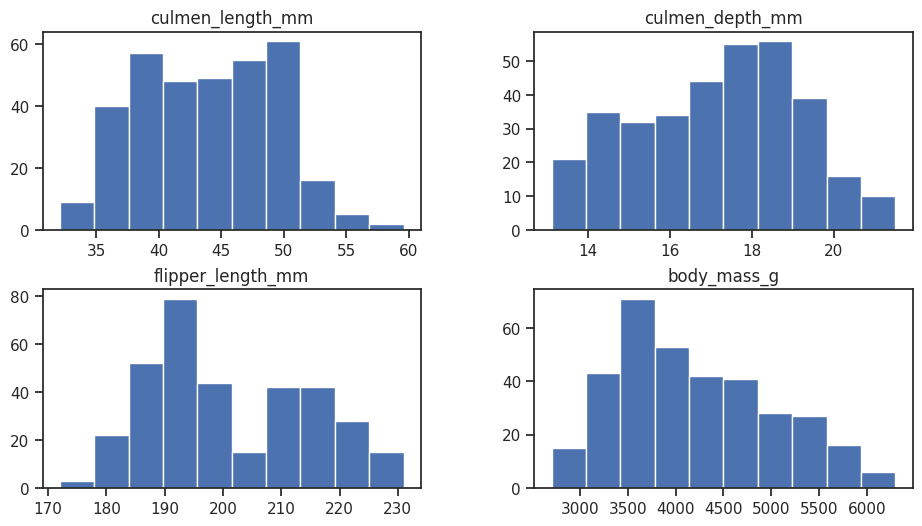

In [476]:
df.hist(layout=(4,2), figsize=(10,12), grid=False)
;
# El punto y coma al final evita que se imprima el objeto Axes en Jupyter Notebooks
# Another option is to use:
# plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
# plt.show()

Example Note: Different distributions observed in histograms: normal, skewed, bimodal.

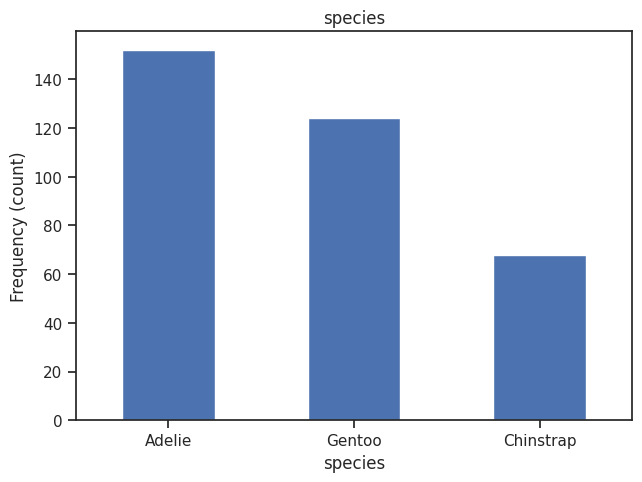

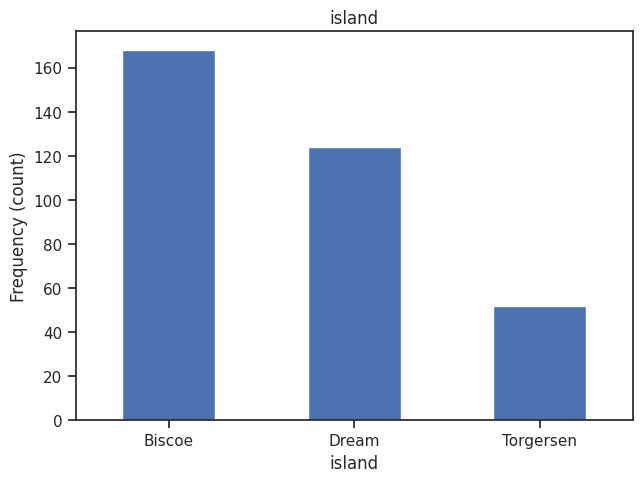

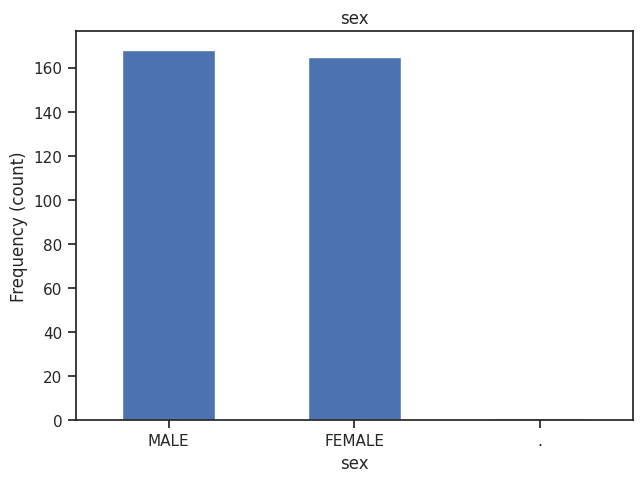

In [477]:
for cat_col in df.select_dtypes(include="object").columns.tolist():
    df[cat_col].value_counts().plot(kind='bar', rot=0).set_title(cat_col)
    plt.ylabel('Frequency (count)') # Etiqueta del eje Y using matplotlib
    plt.show() # Force display all plots in loop

Example note:
- Categorías desbalanceadas en variables categóricas.
- Error en categoría sex: presencia de categoría '.' necesita limpieza.

#### 2.2.1 Recursos adicionales para EDA (Exploratory Data Analysis)

Check folder cheatsheets for additional EDA notebooks and resources.

In [478]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Penguins Dataset EDA Report", explorative=True)
profile.to_notebook_iframe()  # Mostrar reporte en Jupyter Notebook
# profile.to_file("penguins_eda_report.html")  # Guardar reporte como archivo HTML

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 62335.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [479]:
import sweetviz as sv # current version fails missing disutils dependency (deprecated in python 3.12+) and installing setuptools>=80.9.0 doesn't help

# analyze_report = sv.analyze(df)
# analyze_report.show_notebook()  # Mostrar reporte en Jupyter Notebook
# analyze_report.show_html("penguins_sweetviz_report.html")  # Generar y guardar reporte HTML

In [480]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
# chart_format options: 'bokeh' (interactive), 'svg' (static images), 'server' (for web apps)
dft = AV.AutoViz(filename="", dfte=df, depVar="", verbose=1, chart_format="bokeh", max_rows_analyzed=150000, max_cols_analyzed=30, save_plot_dir=None, lowess=False)

Shape of your Data Set loaded: (344, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No scatter plots with depVar when no depVar is given.


BokehModel(combine_events=True, render_bundle={'docs_json': {'baf9f721-3899-4933-b8ea-ac10955cf956': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'e0f551fe-5a9d-4413-8a9d-222950fe126a': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'e029abb3-9fd1-4116-b139-1e3ab5bef402': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'9fd45894-9abc-45b2-aaab-560629b7fa59': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'3ab57cd9-f612-4f41-9ca6-ac1f10db7b9b': {'version…

Time to run AutoViz (in seconds) = 2


In [481]:
import pygwalker as pyg

pyg.walk(df)  # This will open an interactive EDA interface in Jupyter Notebook

Box(children=(HTML(value='\n<div id="ifr-pyg-000644f9304b20a7nPFz48DjqipVJI1L" style="height: auto">\n    <hea…

#### 2.2.2 Exploradores de datos automáticos
- Librerías que automatizan gran parte del proceso de EDA, generando reportes y visualizaciones automáticamente.

## 3. Data profiling and data cleaning

- Data profiling: búsqueda de errores, inconsistencias, valores faltantes, duplicados, etc. dentro del conjunto de datos.
- Data cleaning: proceso de corrección o eliminación de datos erróneos o inconsistentes para mejorar la calidad del conjunto de datos.

### 3.1 Missing values
- Identificación y manejo de valores faltantes.
- Nomenclatura común: NaN (Not a Number), None, null, etc.
    - .isna()/isnull(): Identifica valores faltantes en el DataFrame.

#### 3.1.1 Information about missing values
- Percentage of missing values per column.

In [482]:
df.isna().sum()  # Conteo de valores faltantes por columna

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [483]:
df.isna().sum().sum()  # Conteo total de valores faltantes en el DataFrame

np.int64(18)

In [484]:
round(df.isna().mean() * 100, 2)  # Porcentaje de valores faltantes por columna

species              0.00
island               0.00
culmen_length_mm     0.58
culmen_depth_mm      0.58
flipper_length_mm    0.58
body_mass_g          0.58
sex                  2.91
dtype: float64

#### 3.1.2 Option 1: Drop rows with missing values
- Use .dropna() to remove rows with any missing values.

In [485]:
df[df['sex'].isna()].head()  # Mostrar filas con valores faltantes en la columna '

species   island    culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3   Adelie  Torgersen         NaN              NaN                NaN         
8   Adelie  Torgersen        34.1             18.1              193.0         
9   Adelie  Torgersen        42.0             20.2              190.0         
10  Adelie  Torgersen        37.8             17.1              186.0         
11  Adelie  Torgersen        37.8             17.3              180.0         

    body_mass_g sex   
3        NaN     NaN  
8     3475.0     NaN  
9     4250.0     NaN  
10    3300.0     NaN  
11    3700.0     NaN

In [486]:
# in place by default is False
df.dropna(axis=0).isna().sum()  # Eliminar filas con valores faltantes y verificar conteo de valores faltantes restante

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### 3.1.3 Option 2: Fill missing values
- Use .fillna() to replace missing values with a specific value or statistical measure (mean, median, mode, etc.).

In [613]:
# select_dtypes include and exclude options, only numeric columns
# not final as we dont reassign to df
df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).mean()).isna().sum()  # Rellenar valores faltantes en columnas numéricas con la media y verificar conteo de valores faltantes restante
# example with one column
# df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

species                               0
island                                0
sex                                   0
culmen_length_mm                      0
culmen_depth_mm                       0
flipper_length_mm                     0
body_mass_g                           0
body_mass_flipper_length_ratio        0
body_mass_culmen_length_ratio         0
culmen_length_flipper_length_ratio    0
dtype: int64

In [614]:
df.dropna(axis=0, inplace=True) # Eliminar filas con valores faltantes del DataFrame original

As the missing values are not many in this dataset, we can choose to drop them or fill them depending on the context of the analysis. For this example, we will drop the rows with missing values.

### 3.2 Outliers
- Identificación y manejo de valores atípicos (outliers). Valores extremos que pueden distorsionar el análisis estadístico. Su origen puede ser errores de medición, errores de entrada de datos o variabilidad natural en los datos.
- Métodos comunes para detectar outliers:
    - Z-Score: Valores que se encuentran a más de 3 desviaciones estándar de la media.
    - IQR (Interquartile Range): Valores que se encuentran fuera de 1.5 veces el rango intercuartílico (IQR) por debajo del primer cuartil (Q1) o por encima del tercer cuartil (Q3).
- Métodos visuales: Boxplots, scatter plots, etc.
- Estrategias para manejar outliers:
    - Eliminación: Si se determina que son errores o no representan el fenómeno estudiado.
    - Transformación: Aplicar transformaciones matemáticas (logarítmica, raíz cuadrada, etc.) para reducir su impacto.
    - Imputación: Reemplazar outliers con valores más representativos (media, mediana, etc.).
    - Mantenerlos: Si son parte legítima del conjunto de datos y representan variabilidad natural.

#### 3.2.1 Detecting outliers with Z-Score
- Método estadístico que mide cuántas desviaciones estándar está un valor de la media. Valores con un Z-Score mayor a 3 o menor a -3 se consideran outliers.

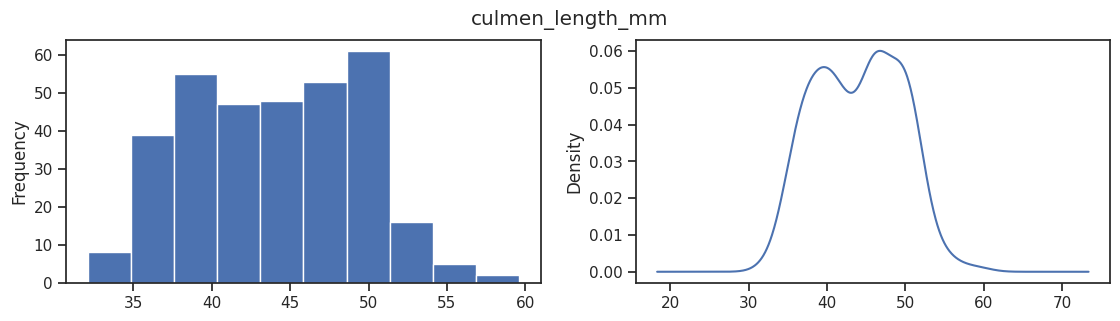

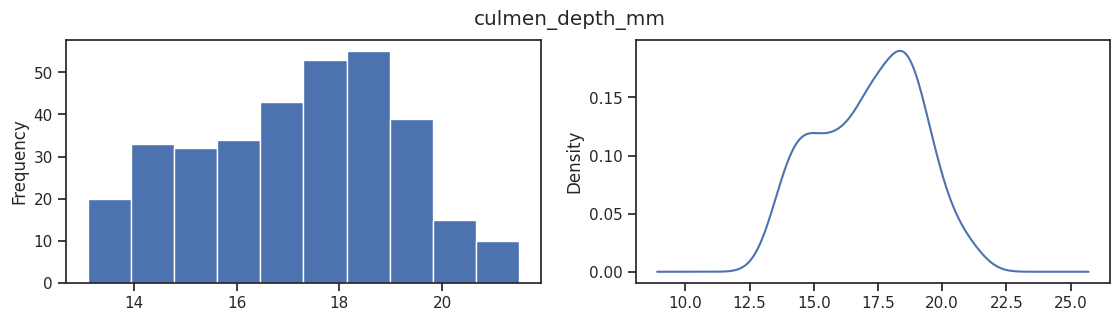

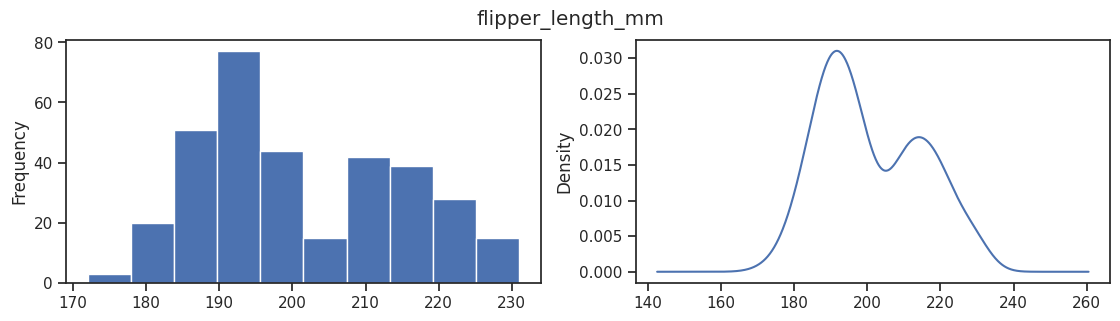

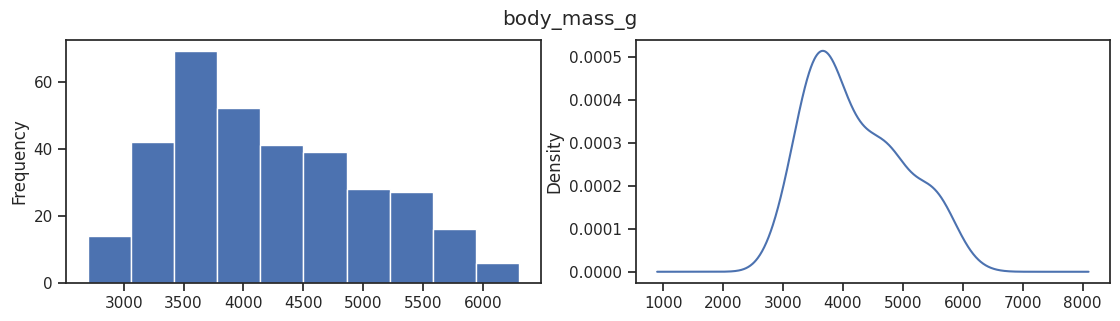

In [489]:
# Comprobar si la distribución de los datos se asemeja a una distribución normal
for num_col in df.select_dtypes(include=np.number).columns:
    fig, ax = plt.subplots(1, 2)

    df[num_col].hist(figsize=(12, 3), grid=False, ax=ax[0])
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[1])

    ax[0].set_ylabel('Frequency')
    ax[1].set_ylabel('Density')
    fig.suptitle(num_col)
    %matplotlib inline
    plt.show(block=True)

Asumimos que el método de distribución va a ser cercano al normal(si no es así, deberíamos considerar otro método), por lo que usaremos el Z-score para detectar outliers.

In [490]:
# Prints dataset outliers percentage using Z-score method
def print_zscore_outliers(dataframe: DataFrame, threshold: float=3.0) -> None:
    print(f"Original rows: {dataframe.shape[0]}")
    # find absolute value of Z-score for each value in the DataFrame
    z_scores = np.abs(stats.zscore(dataframe.select_dtypes(include=np.number)))
    # remove outliers
    filtered_entries = (z_scores < threshold).all(axis=1)
    df_no_outliers = dataframe[filtered_entries]
    outliers_count = dataframe.shape[0] - df_no_outliers.shape[0]
    outliers_percentage = (outliers_count / dataframe.shape[0]) * 100
    print(f"Outliers detected: {outliers_count} ({outliers_percentage:.2f}%)")

    # print outliers percent per numeric column
    for num_col in dataframe.select_dtypes(include=np.number).columns:
        z_scores_col = np.abs(stats.zscore(dataframe[num_col]))
        filtered_entries_col = z_scores_col < threshold
        df_no_outliers_col = dataframe[filtered_entries_col]
        outliers_count_col = dataframe.shape[0] - df_no_outliers_col.shape[0]
        outliers_percentage_col = (outliers_count_col / dataframe.shape[0]) * 100
        print(f"  {num_col}: {outliers_count_col} ({outliers_percentage_col:.2f}%)")


In [491]:
print_zscore_outliers(df)

Original rows: 334
Outliers detected: 0 (0.00%)
  culmen_length_mm: 0 (0.00%)
  culmen_depth_mm: 0 (0.00%)
  flipper_length_mm: 0 (0.00%)
  body_mass_g: 0 (0.00%)


In [492]:
print_zscore_outliers(df, threshold=2.0)

Original rows: 334
Outliers detected: 28 (8.38%)
  culmen_length_mm: 6 (1.80%)
  culmen_depth_mm: 8 (2.40%)
  flipper_length_mm: 9 (2.69%)
  body_mass_g: 9 (2.69%)


#### 3.2.2 Detecting outliers with IQR
- Método estádistico basado en el cálculo de los cuartiles Q1 (25%) y Q3 (75%) y el rango intercuartílico (IQR = Q3 - Q1). Definimos outliers como aquellos valores que se encuentran por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR.

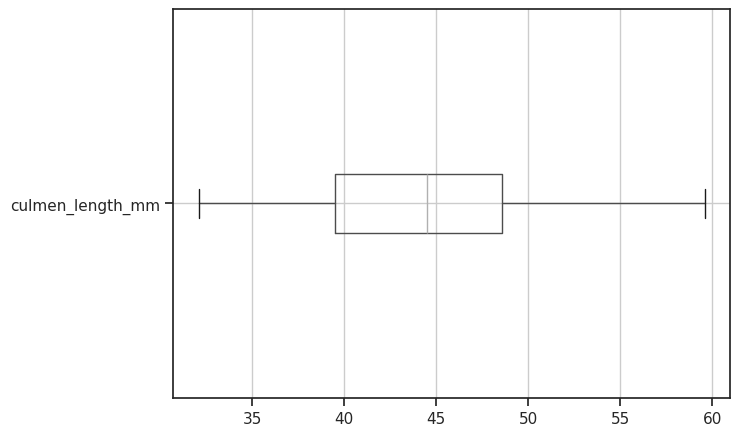

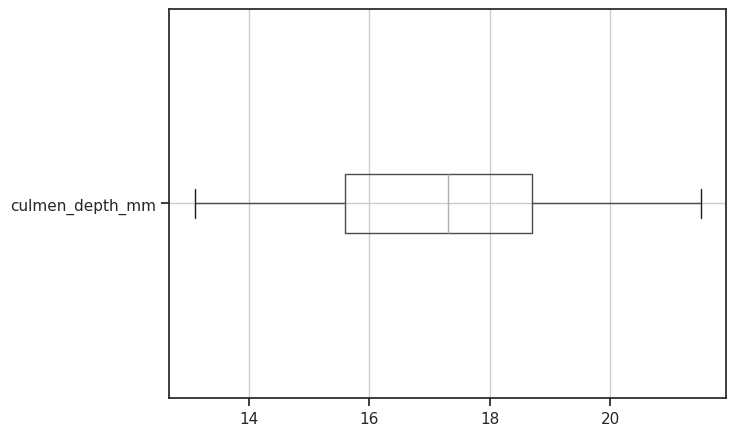

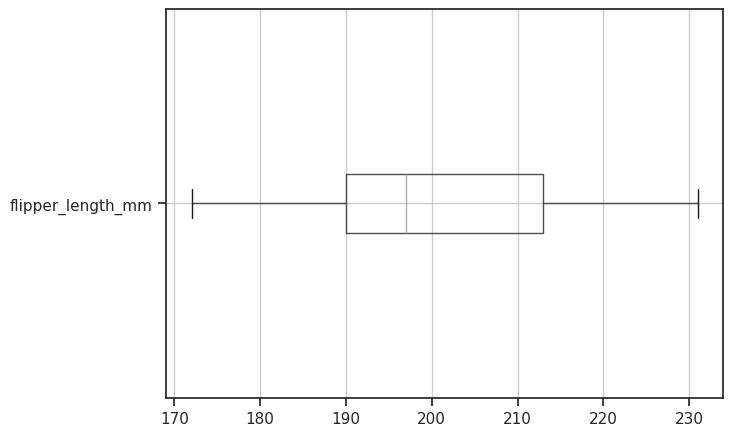

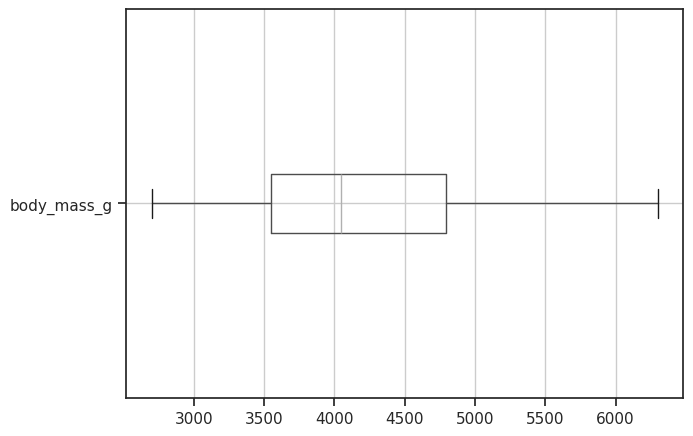

In [493]:
for num_col in df.select_dtypes(include=np.number).columns:
    df.boxplot(column=num_col, vert=False)
    plt.show(block=True)

Podemos ver visualmente que no hay outliers.

In [494]:
# Print dataset outliers using IQR method
def print_iqr_outliers(dataframe: DataFrame) -> None:
    print(f"Original rows: {dataframe.shape[0]}")
    outliers_total = 0
    for num_col in dataframe.select_dtypes(include=np.number).columns:
        Q1 = dataframe[num_col].quantile(0.25)
        Q3 = dataframe[num_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[num_col] < lower_bound) | (dataframe[num_col] > upper_bound)]
        outliers_count = outliers.shape[0]
        outliers_percentage = (outliers_count / dataframe.shape[0]) * 100
        outliers_total += outliers_count
        print(f"  {num_col}: {outliers_count} ({outliers_percentage:.2f}%)")
    total_percentage = (outliers_total / dataframe.shape[0]) * 100
    print(f"Total outliers detected: {outliers_total} ({total_percentage:.2f}%)")

In [495]:
print_iqr_outliers(df)

Original rows: 334
  culmen_length_mm: 0 (0.00%)
  culmen_depth_mm: 0 (0.00%)
  flipper_length_mm: 0 (0.00%)
  body_mass_g: 0 (0.00%)
Total outliers detected: 0 (0.00%)


#### 3.2.3 Tratamiento de outliers
- Dependiendo del contexto y del análisis, podemos optar por:
    - Eliminación: se desechan las observaciones con outliers.
    - Transformación: aplicar transformaciones matemáticas para reducir su impacto (cambiar escala, rango, etc.).
    - Imputación: reemplazar los outliers con valores más representativos, como la media o la mediana.

In [496]:
# Eliminación
threshold = 2.0 # More strict threshold for this example, menos de dos desviaciones típicas
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
filtered_entries = (z_scores < threshold).all(axis=1)
df_clean = df[filtered_entries]
print(f"Original rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df_clean.shape[0]}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

Original rows: 334
Rows after outlier removal: 306
Rows removed: 28


In [497]:
df_clean.head()

species   island    culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.1             18.7              181.0         
1  Adelie  Torgersen        39.5             17.4              186.0         
2  Adelie  Torgersen        40.3             18.0              195.0         
4  Adelie  Torgersen        36.7             19.3              193.0         
5  Adelie  Torgersen        39.3             20.6              190.0         

   body_mass_g   sex    
0    3750.0       MALE  
1    3800.0     FEMALE  
2    3250.0     FEMALE  
4    3450.0     FEMALE  
5    3650.0       MALE

In [498]:
# Imputación
threshold = 3.0
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
for num_col in df.select_dtypes(include=np.number).columns:
    z = np.abs(stats.zscore(df[num_col]))
    outliers = df[z > threshold]
    df.loc[outliers.index, num_col] = np.nan
    df[num_col].fillna(df[num_col].median(), inplace=True)

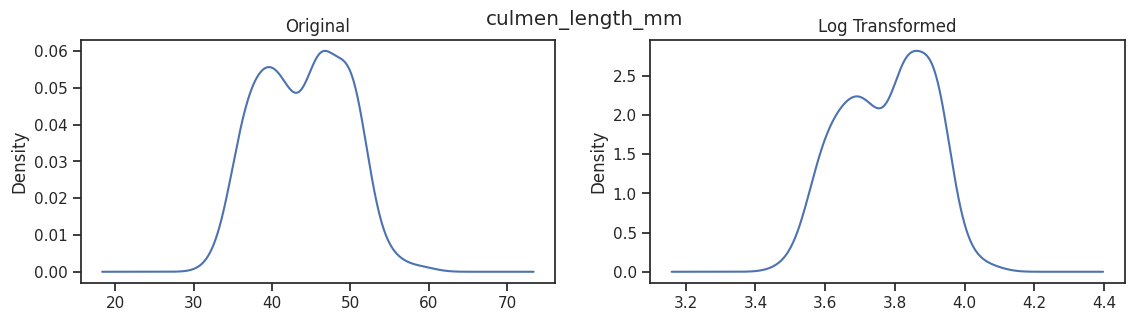

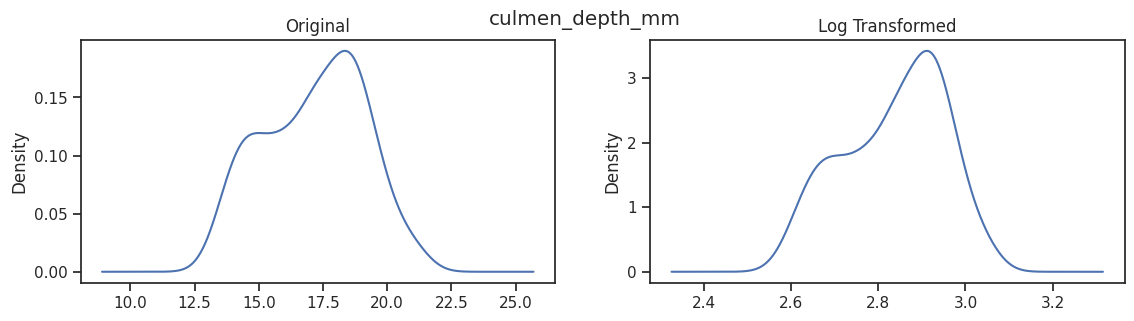

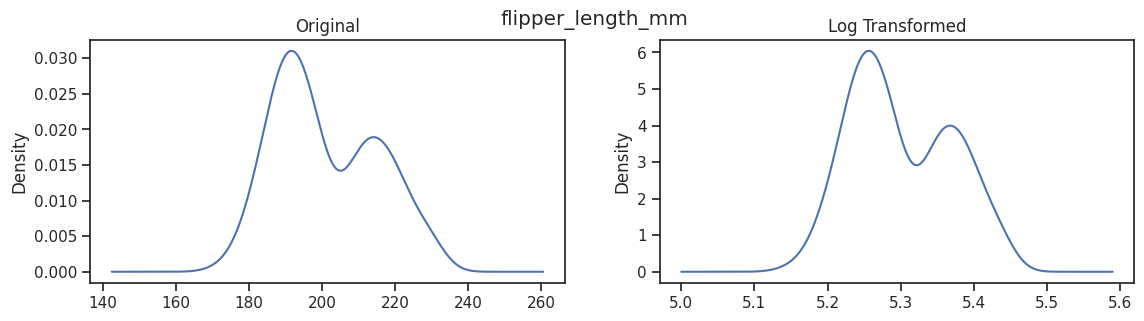

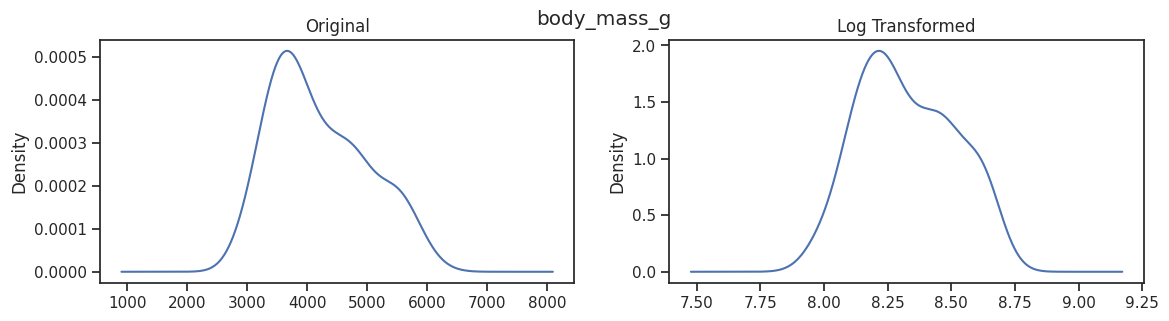

In [499]:
# Transformación logarítmica, para reducir el impacto de outliers
for num_col in df.select_dtypes(include=np.number).columns:
    fig, ax = plt.subplots(1, 2)
    
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
    np.log(df[num_col]).plot.density(figsize=(12, 3), grid=False, ax=ax[1])

    ax[0].title.set_text('Original')
    ax[1].title.set_text('Log Transformed')
    ax[0].set_ylabel('Density')
    fig.suptitle(num_col)
    plt.show(block=True)

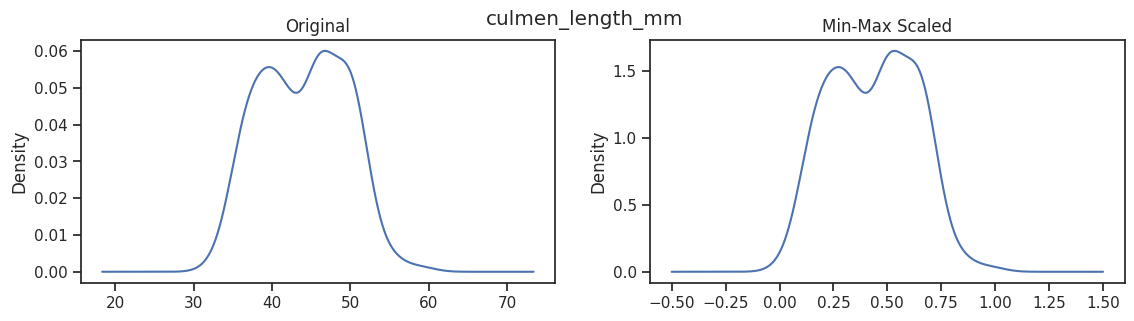

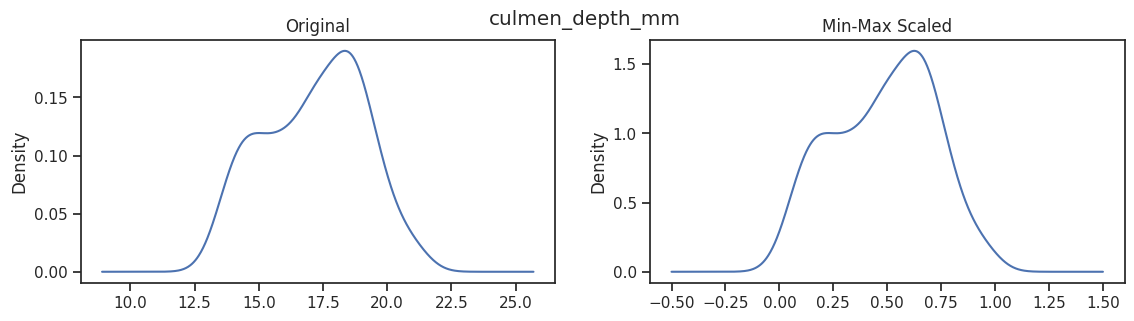

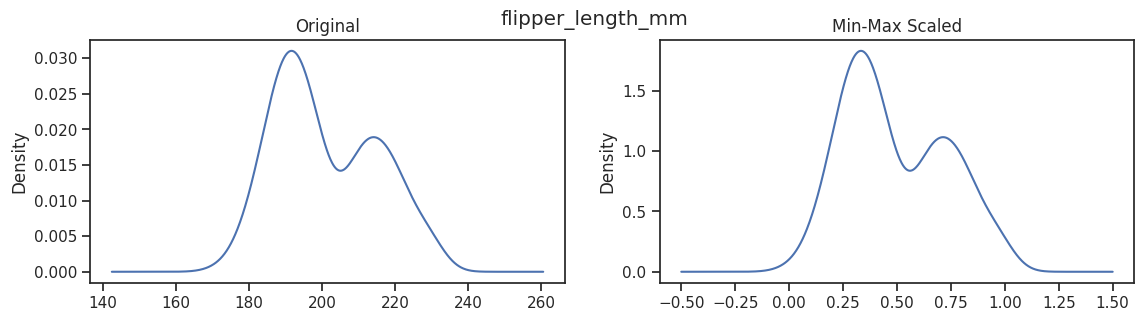

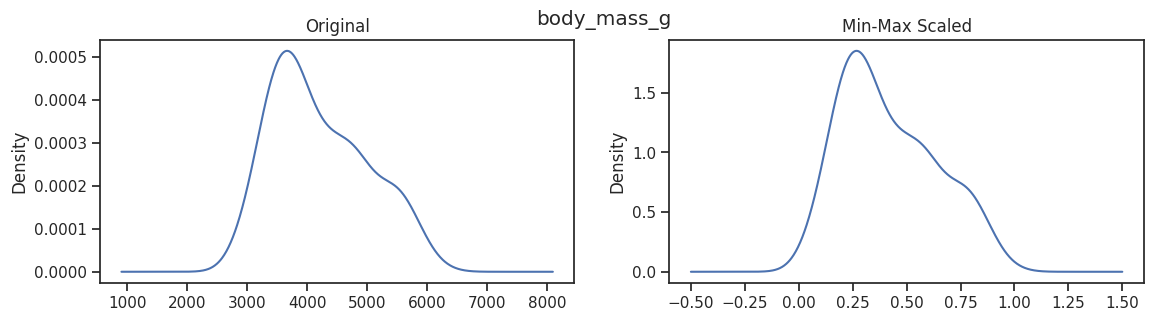

In [500]:
# Transformación Min-Max Scaling, para reducir el impacto de outliers
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df.select_dtypes(include=np.number))

for num_col in df_scaled.select_dtypes(include=np.number).columns:
    fig, ax = plt.subplots(1, 2)
    
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
    df_scaled[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[1])

    ax[0].title.set_text('Original')
    ax[1].title.set_text('Min-Max Scaled')
    ax[0].set_ylabel('Density')
    fig.suptitle(num_col)
    plt.show(block=True)

Tomaríamos la decisión si aplicar una estrategia u otra.

### 3.3 Valores duplicados
- Valores o entradas de datos que se repiten en el conjunto de datos.
- Suelen desecharse ya que no aportan información adicional ya que el modelo de machine learning no ganará nada con ellos.
- Identificación: .duplicated() para identificar filas duplicadas.
- Eliminación: .drop_duplicates() para eliminar filas duplicadas del DataFrame.

In [501]:
df.duplicated().sum()  # Conteo de filas duplicadas en el DataFrame

np.int64(0)

In [502]:
df.drop_duplicates(keep='first', inplace=True)  # Eliminar filas duplicadas del DataFrame, manteniendo la primera ocurrencia
# help(df.drop_duplicates) Display help for drop_duplicates method

### 3.4 Valores incorrectos
- Valores incorrectos o inconsistentes en el conjunto de datos. Pueden ser errores de entrada de datos, errores de medición o inconsistencias en la forma en que se registran los datos.
- Identificación: Revisión manual, visualizaciones, reglas de validación, análisis estadístico (distribución, frecuencias). Necesita conocimiento del dominio.

In [503]:
df.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [504]:
df = df[df['sex'].isin(['MALE', 'FEMALE'])]
# df = df[~df['sex'].isin(['UNKNOWN', '', None, '.'])]
# df = df[df['sex'] != ('.')]

## 4. Data Transformation
- Nos permite mejorar la comprensión de los datos, su rendimiento en el entrenamiento de modelos o para adecuar su uso a los requisitos de los algoritmos de machine learning para que pueda aprender y predecir de manera efectiva.

### 4.1 Escalado de datos (Scaling)
- Transformación de valores a un rango o escala concreta.
- Se utiliza cuando las características tienen diferentes unidades o rangos, lo que puede afectar el rendimiento de los algoritmos de machine learning.
- Ayuda a comparar características en la misma escala, mejorando la convergencia y estabilidad de los algoritmos de machine learning.

In [505]:
df_num = df.select_dtypes(include=np.number)

#### 4.1.1 Normalización
- Transforma los datos a una escale entre el menor y el mayor valor de la columna.
- Pretendemos cambiar el rango de los datos y que posean una distribución normal.

In [506]:
df_num_norm = (df_num - df_num.mean()) / (df_num.max() - df_num.min())  # Normalización de columnas numéricas
df_num_norm.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0     -0.177920         0.182754         -0.338423       -0.126960  
1     -0.163374         0.027992         -0.253677       -0.113071  
2     -0.134283         0.099421         -0.101135       -0.265849  
4     -0.265192         0.254183         -0.135033       -0.210294  
5     -0.170647         0.408945         -0.185881       -0.154738

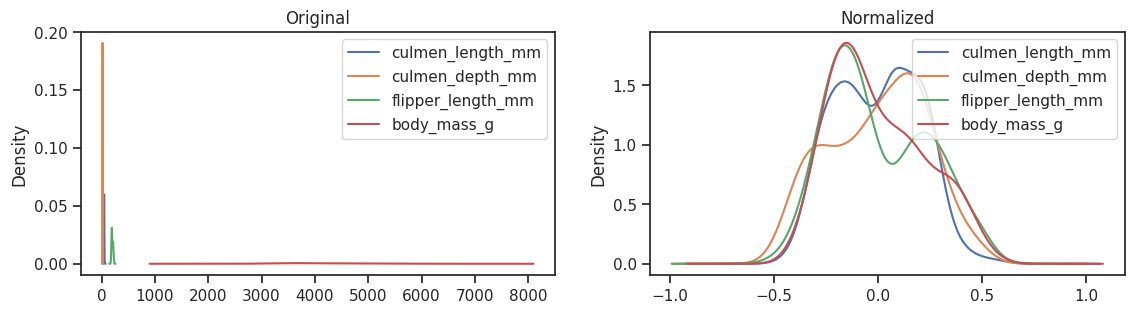

In [507]:
fig, ax = plt.subplots(1, 2)
df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_norm.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Original')
ax[1].title.set_text('Normalized')
ax[0].set_ylabel('Density')
plt.show(block=True)

In [508]:
df.select_dtypes(include='O').join(df_num_norm, how='left').head()

species   island     sex    culmen_length_mm  culmen_depth_mm  \
0  Adelie  Torgersen    MALE     -0.177920         0.182754       
1  Adelie  Torgersen  FEMALE     -0.163374         0.027992       
2  Adelie  Torgersen  FEMALE     -0.134283         0.099421       
4  Adelie  Torgersen  FEMALE     -0.265192         0.254183       
5  Adelie  Torgersen    MALE     -0.170647         0.408945       

   flipper_length_mm  body_mass_g  
0     -0.338423       -0.126960    
1     -0.253677       -0.113071    
2     -0.101135       -0.265849    
4     -0.135033       -0.210294    
5     -0.185881       -0.154738

#### 4.1.2 Min-Max Scaling
- Substraer a cada valor el valor mínimo de la columna y dividir por el rango (máximo - mínimo) de dicho conjunto de datos.
- MinMaxScaler() mantiene la forma de la distribución de los datos.

In [509]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num_minmax = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_minmax.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0      0.254545         0.666667          0.152542        0.291667  
1      0.269091         0.511905          0.237288        0.305556  
2      0.298182         0.583333          0.389831        0.152778  
3      0.167273         0.738095          0.355932        0.208333  
4      0.261818         0.892857          0.305085        0.263889

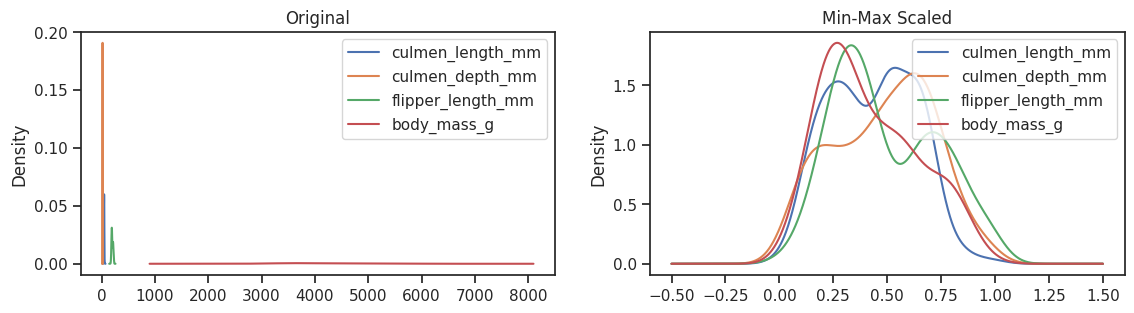

In [510]:
fig, ax = plt.subplots(1, 2)
df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_minmax.plot.density(figsize=(12, 3), grid=False, ax=ax[1])
ax[0].title.set_text('Original')
ax[1].title.set_text('Min-Max Scaled')
ax[0].set_ylabel('Density')
plt.show(block=True)

#### 4.1.3 Estandarización
- Transforma los datos extrayendo la media y dividiendo por la desviación estándar de la columna.
- StandardScaler() transforma los datos para que tengan una media de 0 y una desviación estándar de 1.
- Útil cuando los datos siguen una distribución normal o gaussiana.

In [511]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)
df_num_standard.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0     -0.896042         0.780732         -1.426752       -0.568475  
1     -0.822788         0.119584         -1.069474       -0.506286  
2     -0.676280         0.424729         -0.426373       -1.190361  
3     -1.335566         1.085877         -0.569284       -0.941606  
4     -0.859415         1.747026         -0.783651       -0.692852

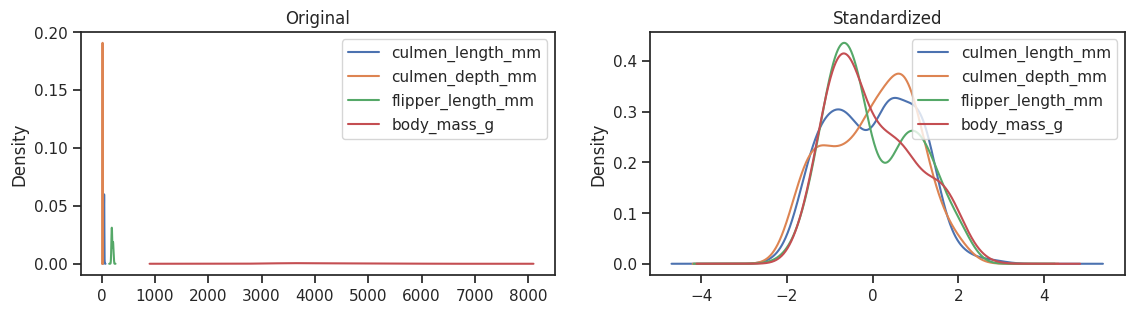

In [512]:
fig, ax = plt.subplots(1, 2)
df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_standard.plot.density(figsize=(12, 3), grid=False, ax=ax[1])
ax[0].title.set_text('Original')
ax[1].title.set_text('Standardized')
ax[0].set_ylabel('Density')
plt.show(block=True)

Text(0, 0.5, 'Density')

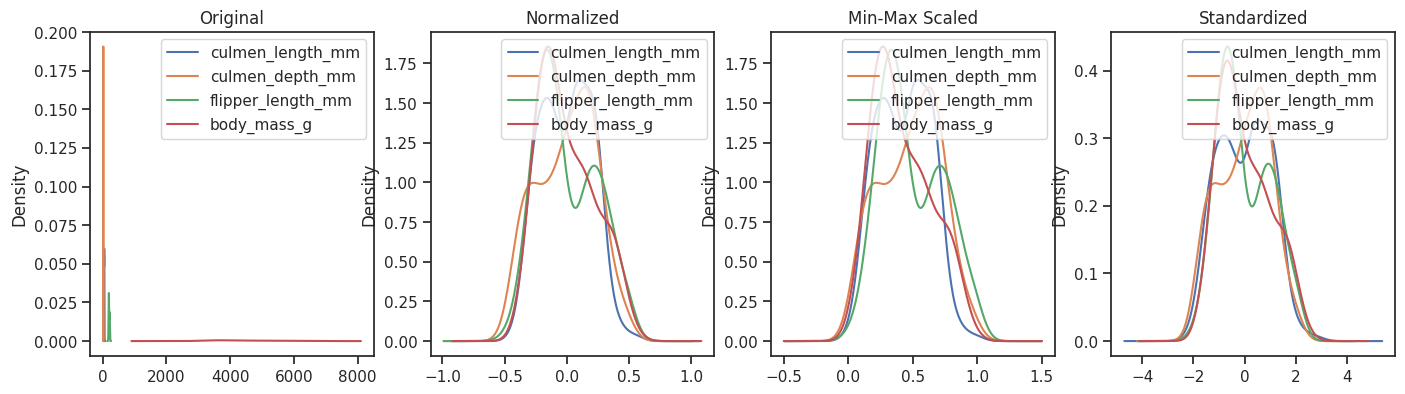

In [513]:
# Comparamos los 3 métodos de escalado
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
df_num.plot.density(grid=False, ax=ax[0])
df_num_norm.plot.density(grid=False, ax=ax[1])
df_num_minmax.plot.density(grid=False, ax=ax[2])
df_num_standard.plot.density(grid=False, ax=ax[3])
ax[0].title.set_text('Original')
ax[1].title.set_text('Normalized')
ax[2].title.set_text('Min-Max Scaled')
ax[3].title.set_text('Standardized')
ax[0].set_ylabel('Density')

Elegimos por ejemplo min-max scaling para este conjunto de datos, ya que no todos los atributos siguen una distribución normal (algunos son sesgados) y queremos mantener la forma de la distribución original. Recordar que todavía no lo hemos aplicado al DataFrame original, solo a una copia de las columnas numéricas para visualizar el resultado.

In [514]:
df.select_dtypes(include='O').join(df_num_minmax, how='left').head()

species   island     sex    culmen_length_mm  culmen_depth_mm  \
0  Adelie  Torgersen    MALE      0.254545         0.666667       
1  Adelie  Torgersen  FEMALE      0.269091         0.511905       
2  Adelie  Torgersen  FEMALE      0.298182         0.583333       
4  Adelie  Torgersen  FEMALE      0.261818         0.892857       
5  Adelie  Torgersen    MALE      0.247273         0.559524       

   flipper_length_mm  body_mass_g  
0      0.152542        0.291667    
1      0.237288        0.305556    
2      0.389831        0.152778    
4      0.305085        0.263889    
5      0.152542        0.256944

### 4.2 Codificación (Encoding)
- Transformación de variables categóricas en variables numéricas para que puedan ser utilizadas por algoritmos de machine learning.
- Los algoritmos de machine learning generalmente requieren datos numéricos para realizar cálculos matemáticos y estadísticos.

In [515]:
df_cat = df.select_dtypes(include='O')
df_cat.head()

species   island     sex  
0  Adelie  Torgersen    MALE
1  Adelie  Torgersen  FEMALE
2  Adelie  Torgersen  FEMALE
4  Adelie  Torgersen  FEMALE
5  Adelie  Torgersen    MALE

#### 4.2.1 Label/Ordinal Encoding
- Asigna un valor numérico único a cada categoría en una variable categórica ordinal (con un orden inherente).
- Útil para variables categóricas ordinales donde el orden de las categorías es importante (por ejemplo, niveles de educación: primaria, secundaria, terciaria). Usamos LabelEncoder de sklearn.

In [516]:
# specify the order of categories for ordinal encoding manually
ordinal_sex_map = {'MALE': 0, 'FEMALE': 1}
df_cat['sex'].map(ordinal_sex_map).value_counts()

sex
0    168
1    165
Name: count, dtype: int64

In [517]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cat_le = df_cat.apply(le.fit_transform)
df_cat_le.head()

species  island  sex
0     0        2     1 
1     0        2     0 
2     0        2     0 
4     0        2     0 
5     0        2     1

In [518]:
for col in df_cat.columns:
    print(f"{col}: {list(set(df[col]))} --> {list(set(df_cat_le[col]))}")

species: ['Gentoo', 'Chinstrap', 'Adelie'] --> [0, 1, 2]
island: ['Torgersen', 'Biscoe', 'Dream'] --> [0, 1, 2]
sex: ['FEMALE', 'MALE'] --> [0, 1]


#### 4.2.2 One-Hot/Dummy Encoding
- Codificación de cada valor único con la creación de una nueva variable.
- Cada nueva variable representa una categoría y toma el valor 1 si la observación pertenece a esa categoría y 0 en caso contrario.
- Útil para variables categóricas nominales sin un orden inherente (por ejemplo, colores: rojo, azul, verde).
- El Dummy Encoding puede aumentar significativamente el número de columnas en el conjunto de datos, especialmente si la variable categórica tiene muchas categorías únicas.
- Es similar al One-Hot Encoding, pero en Dummy Encoding se elimina una de las columnas para evitar la multicolinealidad (dummy variable trap). Usamos pd.get_dummies() de pandas para One-Hot Encoding y drop_first=True para Dummy Encoding.

In [519]:
# One-Hot Encoding
pd.get_dummies(df_cat['species']).head()

Adelie  Chinstrap  Gentoo
0   True     False     False
1   True     False     False
2   True     False     False
4   True     False     False
5   True     False     False

In [520]:
df_cat_onehot = pd.get_dummies(df_cat, drop_first=False).astype(np.int8)
df_cat_onehot.head()

species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0         1                0                 0              0         
1         1                0                 0              0         
2         1                0                 0              0         
4         1                0                 0              0         
5         1                0                 0              0         

   island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0        0               1              0          1     
1        0               1              1          0     
2        0               1              1          0     
4        0               1              1          0     
5        0               1              0          1

In [521]:
# Dummy Encoding
pd.get_dummies(df_cat['species'], drop_first=True, prefix='species').astype(np.int8).head()

species_Chinstrap  species_Gentoo
0          0                 0      
1          0                 0      
2          0                 0      
4          0                 0      
5          0                 0

In [522]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True).astype(np.int8)
df_cat_dummy.sample(n=4, random_state=1)

species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  \
65           0                 0              0               0          
276          0                 1              0               0          
186          1                 0              1               0          
198          1                 0              1               0          

     sex_MALE  
65       1     
276      0     
186      1     
198      0

#### 4.2.3 Binary Encoding
- Convierte cada categoría en una representación binaria.
- Cada categoría se representa como una secuencia de bits (0s y 1s).
- Útil para variables categóricas con un gran número de categorías únicas, ya que reduce la dimensionalidad en comparación con One-Hot Encoding.
- Requiere convertir primero las categorías a números enteros antes de la conversión a binario.

In [523]:
df_cat_binary = df_cat.copy()
# specify the order of categories
binary_species_map = {'Gentoo': 0, 'Chinstrap': 1, 'Adelie': 2}
df_cat_binary['species'] = df_cat_binary['species'].map(binary_species_map).apply(lambda x: format(x, 'b'))
df_cat_binary['species'].unique()

array(['10', '1', '0'], dtype=object)

In [524]:
for col in df_cat_binary.columns:
    le = LabelEncoder()
    ids = le.fit_transform(df_cat_binary[col])
    mapping = dict(zip(le.classes_, range(len(le.classes_))))
    df_cat_binary[col] = df_cat_binary[col].map(mapping).astype(np.int8).apply(lambda x: format(x, 'b'))

In [525]:
for col in df_cat_binary.columns:
    print(f"{col}: {df_cat[col].unique().tolist()} --> {df_cat_binary[col].unique().tolist()}")

species: ['Adelie', 'Chinstrap', 'Gentoo'] --> ['10', '1', '0']
island: ['Torgersen', 'Biscoe', 'Dream'] --> ['10', '0', '1']
sex: ['MALE', 'FEMALE'] --> ['1', '0']


#### 4.2.4 Frequency/Count Encoding
- Reemplaza cada categoría con la frecuencia o el conteo de esa categoría en el conjunto
- Induce involuntamiente un sesgo de orden en las categorías basándose en su frecuencia, lo que puede afectar el rendimiento del modelo si la frecuencia no está relacionada con la variable objetivo.

In [526]:
df_cat_freq = df_cat.copy()
df_cat_freq['species'] = df_cat_freq['species'].map(df_cat_freq['species'].value_counts())
print(f"species: {df_cat_freq['species'].unique().tolist()}")

species: [146, 68, 119]


#### 4.2.5 Target/Mean Encoding
- Codifiación de categorías basada en la media de la variable objetivo para cada categoría.
- Útil para variables categóricas con muchas categorías únicas. Ya que mantiene el tamaño inicial del conjunto de datos sin aumentar la dimensionalidad.
- Requiere cuidado para evitar el sobreajuste (overfitting), especialmente si algunas categorías tienen pocas observaciones. Puede ocurrir también si el dataset no se ha dividido en conjunto de entrenamiento y prueba.
- Técnicas como el suavizado (smoothing) o la validación cruzada (cross-validation) pueden ayudar a mitigar el riesgo de sobreajuste.

In [527]:
df_cat_target = df_cat.copy()
le = LabelEncoder()
df_cat_target['target'] = le.fit_transform(df['island'])  # Example target variable
target_mean = df_cat_target.groupby('species')['target'].mean()
target_mean

species
Adelie       1.020548
Chinstrap    1.000000
Gentoo       0.000000
Name: target, dtype: float64

In [528]:
# Replace the categorical data with the mean target value for each category
for col in df_cat_target.columns:
    target_mean = df_cat_target.groupby(col)['target'].mean()
    df_cat_target[col] = df_cat_target[col].map(target_mean)

df_cat_target.head()

species  island     sex    target
0  1.020548    2.0   0.642857    2.0 
1  1.020548    2.0   0.660606    2.0 
2  1.020548    2.0   0.660606    2.0 
4  1.020548    2.0   0.660606    2.0 
5  1.020548    2.0   0.642857    2.0

Solución aplicada label encoding, la más sencilla y rápida para este conjunto de datos.

In [529]:
le = LabelEncoder()
df = df_cat.apply(le.fit_transform).join(df_num, how='left')
df.head()

species  island  sex  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0     0        2     1         39.1             18.7              181.0         
1     0        2     0         39.5             17.4              186.0         
2     0        2     0         40.3             18.0              195.0         
4     0        2     0         36.7             19.3              193.0         
5     0        2     1         39.3             20.6              190.0         

   body_mass_g  
0    3750.0     
1    3800.0     
2    3250.0     
4    3450.0     
5    3650.0

### 4.3 Discretización (Discretization)
- Proceso de convertir variables continuas en variables discretas.
- Útil cuando se desea simplificar el análisis, reducir el ruido o mejorar la interpretabilidad de los datos. Mejorando el rendimiento de algunos algoritmos de machine learning.

#### 4.3.1 Uniforme (Uniform discretization or equal-width binning)
- Divide el rango de la variable continua en intervalos de igual tamaño o bins.
- La ventaja y desventaja al mismo tiempo de este tipo de discretización es que no afecta significativamente la distribución original de los datos. Usamos pd.cut() de pandas para realizar la discretización uniforme.

In [530]:
df['flipper_length_bins'] = pd.cut(df['flipper_length_mm'], bins=3, labels=[0, 1, 2])
short_flippers = df[df['flipper_length_bins'] == 0]
medium_flippers = df[df['flipper_length_bins'] == 1]
long_flippers = df[df['flipper_length_bins'] == 2]
print(f"short: max-min diff: {short_flippers['flipper_length_mm'].max() - short_flippers['flipper_length_mm'].min()}")
print(f"medium: max-min diff: {medium_flippers['flipper_length_mm'].max() - medium_flippers['flipper_length_mm'].min()}")
print(f"long: max-min diff: {long_flippers['flipper_length_mm'].max() - long_flippers['flipper_length_mm'].min()}")

short: max-min diff: 19.0
medium: max-min diff: 19.0
long: max-min diff: 19.0


In [531]:
df['flipper_length_bins'].value_counts()

flipper_length_bins
1    131
0    108
2     94
Name: count, dtype: int64

In [532]:
df[['flipper_length_mm', 'flipper_length_bins']].head(5)

flipper_length_mm flipper_length_bins
0        181.0                 0        
1        186.0                 0        
2        195.0                 1        
4        193.0                 1        
5        190.0                 0

#### 4.3.2 Quantiles (Quantile discretization or equal-frequency binning)
- Divide el rango de la variable continua en intervalos (bins) que contienen aproximadamente el mismo número de observaciones.
- Útil para manejar distribuciones sesgadas o con outliers, ya que garantiza que cada bin tenga una representación equitativa de los datos. Usamos pd.qcut() de pandas para realizar la discretización por cuantiles.
- Aunque el tamaño de cada bin es variable, la cantidad de datos en cada bin es constante.

In [533]:
df['flipper_length_bins'] = pd.qcut(df['flipper_length_mm'], q=4)
df['flipper_length_bins'].value_counts()

flipper_length_bins
(171.999, 190.0]    95
(197.0, 213.0]      81
(213.0, 231.0]      81
(190.0, 197.0]      76
Name: count, dtype: int64

In [534]:
df['flipper_length_bins'] = pd.qcut(df['flipper_length_mm'], q=4, labels=[0, 1, 2, 3])
df['flipper_length_bins'].value_counts()
df['culmen_length_bins'] = pd.qcut(df['culmen_length_mm'], q=4, labels=[0, 1, 2, 3])
df['culmen_length_bins'].value_counts()
df['culmen_depth_bins'] = pd.qcut(df['culmen_depth_mm'], q=4, labels=[0, 1, 2, 3])
df['culmen_depth_bins'].value_counts()

culmen_depth_bins
0    85
2    85
1    84
3    79
Name: count, dtype: int64

#### 4.3.3 Discretización avanzada con uso de algoritmos de ML
- Uso de algoritmos de machine learning para determinar los puntos óptimos de corte (bins) en la discretización de variables continuas:
    - Decision Trees: Utilizar árboles de decisión para identificar puntos de corte que maximicen la separación entre clases en la variable objetivo.
    - Clustering: Aplicar algoritmos de clustering (como K-means) para agrupar valores similares y definir bins basados en estos grupos.
    - Optimización basada en el rendimiento del modelo: Evaluar diferentes esquemas de discretización basados en el rendimiento de un modelo de machine learning entrenado con los datos discretizados.

### 4.4 Reducción de dimensionalidad (Dimensionality Reduction)
- Técnicas para reducir el número de características (dimensiones) en un conjunto de datos, manteniendo la mayor cantidad posible de información relevante.
- Útil para mejorar el rendimiento de los modelos de machine learning, reducir el tiempo de entrenamiento y mitigar el problema de la maldición de la dimensionalidad (curse of dimensionality).
- Esta reducción puede ser lineal o no lineal, dependiendo de la técnica utilizada.

In [535]:
df.dtypes

species                   int64
island                    int64
sex                       int64
culmen_length_mm        float64
culmen_depth_mm         float64
flipper_length_mm       float64
body_mass_g             float64
flipper_length_bins    category
culmen_length_bins     category
culmen_depth_bins      category
dtype: object

#### 4.4.1 Selección de características (Feature Selection)
- Identificación y selección de un subconjunto relevante de características del conjunto de datos original.
- **Métodos de filtrado (filter methods)**: Utilizan métricas estadísticas para evaluar la relevancia de cada característica de forma independiente:
    - Chi-Squared (CHI): Prueba estadística para evaluar la probabilidad de correlación utlizando su distribución de frecuencia.
    - ANOVA F-value: Análisis de la varianza, prueba estadística que compara las medias de diferentes grupos para determinar si existen diferencias significativas entre ellos.
    - Pearson Correlation: Mide la relación lineal entre dos variables continuas.
    - Spearman Correlation: Mide la relación monotónica entre dos variables, útil para datos no lineales o no paramétricos.
- **Métodos de envoltura (wrapper methods)**: Utilizan algoritmos de machine learning para evaluar la relevancia de subconjuntos de características:
    - Recursive Feature Elimination: Elimina en base al desempeño del modelo al compararlo con otros subconjuntos.
        - SequentialFeatureSelector: Selecciona características de manera secuencial, agregando o eliminando características basándose en el rendimiento del modelo.
        - RFE: Elimina características de manera recursiva, entrenando el modelo y eliminando las características menos importantes en cada iteración.
    - Forward Selection: Comienza con un conjunto vacío de características y agrega iterativamente las características que mejoran el rendimiento del modelo.
    - Backward Elimination: Comienza con todas las características y elimina iterativamente las menos importantes.
> Implica utilizar el algoritmo / estimador de ML que se va a usar posteriormente para entrenar el modelo.
> Implica utilizar la métrica de evaluación que se va a usar posteriormente para evaluar el modelo.
- **Métodos integrados (embedded methods)**: Consiste en aplicar una regresión lineal regularizada: evita que el modelo entrene con features demasiado complejas para que generalice mejor.
Embedded methods complete the feature selection process within the construction of the machine learning algorithm itself. In other words, they perform feature selection during the model training, which is why we call them embedded methods.
    - They have better accuracy like wrapper methods
    - They have better speed like filter methods
    - They are mainly of 2 types:
        - Regularization 
            - Lasso Regression or L1 Regularization
            - Ridge Regression or L2 Regularization
            - Elastic Nets or L1/L2 Regularization
        - Tree-based Methods
            - Decision Trees
            - Random Forests
            - Gradient Boosting Machines (GBM)
    - Dará un peso a cada feature en función de su importancia para el modelo.
> Implicar utilizar modelos de clasificación o regresión según el tipo de variable objetivo.
> Implicar utilizar la métrica de evaluación que se va a usar posteriormente para evaluar el modelo.

##### 4.4.1.1 Métodos de filtrado (Filter methods)
- sklearn.feature_selection ofrece implementaciones de estos métodos y otros más avanzados. SelectKBest, chi2, f_classif, etc.

In [536]:
from sklearn.feature_selection import SelectKBest, chi2

# Check https://www.blog.trainindata.com/feature-selection-with-filter-methods/
# Feature Selection using Chi-Squared Test, se puede usar para ver la relevancia de las características con respecto a la variable objetivo

X = df.drop(columns=['species'], axis=1)
y = df['species']  # assuming 'species' is the target variable

fs = SelectKBest(score_func=chi2, k=2) # select top 2 features
fs.fit(X, y)

X_train_fs = pd.DataFrame(fs.transform(X), columns= X.columns[fs.get_support()])
X_y_fs = X_train_fs.join(y, how='right')

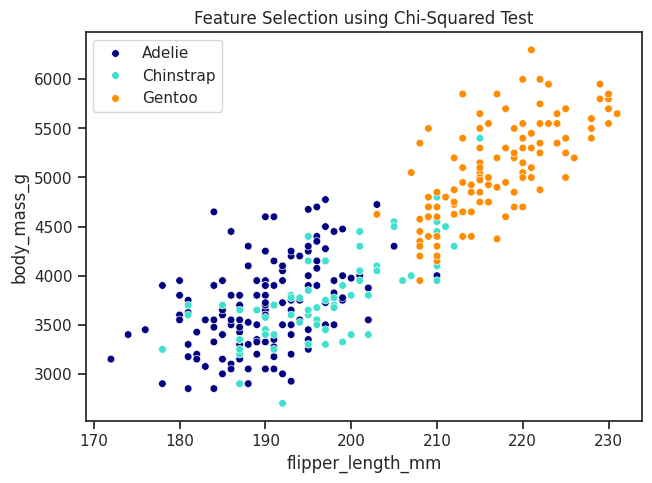

''

In [537]:
target_names = df.species
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

sns.scatterplot(data=X_y_fs, x=X_y_fs.columns[0], y=X_y_fs.columns[1], hue='species', palette=colors, s=30)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, species_name)
plt.title('Feature Selection using Chi-Squared Test')
plt.show()
;

Vemos con esto que usando esas dos características seleccionadas con Chi-Squared, podemos visualizar mejor la separación entre las diferentes especies, pero una se solapa un poco con otra.

- pearson using .corr()

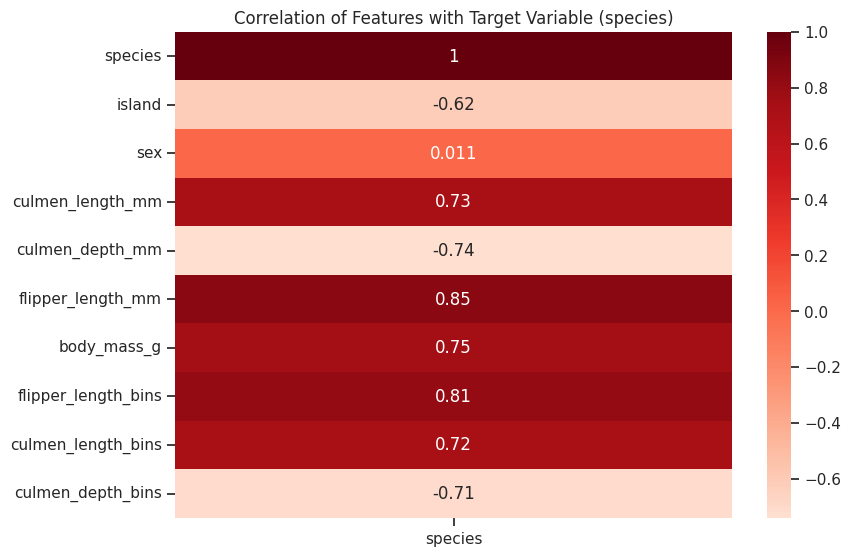

In [538]:
# Correlación de Pearson / Spearman
# Se usa para ver la relevancia de las características con respecto a la variable objetivo

target_correlation = df.corr(method='pearson')[['species']]  # or method='spearman'

plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds, center=0)
plt.title('Correlation of Features with Target Variable (species)')
plt.show()

Vemos la relevancia de las características con respecto a la variable objetivo en este caso species. Podemos ver que las características flipper_length_mm y body_mass_g tienen una correlación positiva moderada con la variable objetivo species, lo que sugiere que estas características pueden ser útiles para distinguir entre las diferentes especies de pingüinos en el conjunto de datos. Las demás características muestran una correlación más débil con la variable objetivo. Por ese motivo se han seleccionado esas dos características en el análisis anterior Chi-Squared.

##### 4.4.1.2 Métodos de envoltura (Wrapper methods)

In [539]:
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# Check https://www.blog.trainindata.com/feature-selection-with-wrapper-methods/

##### 4.4.1.3 Métodos integrados (Embedded methods)
There are mainly of 2 types:
    - Regularization:
        - Lasso Regression (L1 Regularization): Añade una penalización proporcional al valor absoluto de los coeficientes de las características. Tiende a reducir a cero los coeficientes de las características menos importantes, efectivamente seleccionando un subconjunto de características.
        - Ridge Regression (L2 Regularization): Añade una penalización proporcional al cuadrado de los coeficientes de las características. No reduce los coeficientes a cero, pero los hace más pequeños, ayudando a mitigar el sobreajuste.
        - Elastic Net: Combina las penalizaciones L1 y L2, proporcionando un equilibrio entre la selección de características y la reducción de la magnitud de los coeficientes.
    - Tree-based Methods:
        - También existen árboles de decisión y modelos basados en árboles (Random Forest, Gradient Boosting) que incorporan mecanismos de selección de características durante el proceso de entrenamiento.

In [540]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier
# Check https://www.blog.trainindata.com/feature-selection-with-embedded-methods/

#### 4.4.2 Extracción de características (Feature Extraction)
- Técnicas para transformar el conjunto de datos original en un nuevo conjunto de características, generalmente de menor dimensión.
- A diferencia de la selección de características, que selecciona un subconjunto de las características originales, la extracción de características crea nuevas características combinando o transformando las originales.
- Útil para reducir la dimensionalidad, eliminar redundancias y mejorar la interpretabilidad de los datos.
- Usamos técnicas como PCA (Principal Component Analysis), LDA (Linear Discriminant Analysis) o t-SNE (t-Distributed Stochastic Neighbor Embedding) para realizar la extracción de características.

##### 4.4.2.1 PCA (Principal Component Analysis)
- Técnica de reducción de dimensionalidad que transforma un conjunto de características posiblemente correlacionadas en un conjunto de características no correlacionadas llamadas componentes principales.
- Cada componente principal es una combinación lineal de las características originales.
- Los primeros componentes principales capturan la mayor parte de la varianza en los datos.
- Útil para visualizar datos en 2D o 3D, reducir el ruido y mejorar el rendimiento de los modelos de machine learning.
> PCA es sensible a la escala de los datos, por lo que es recomendable estandarizar o normalizar los datos antes de aplicar PCA.

Total explained variance by 2 components: 100.00%


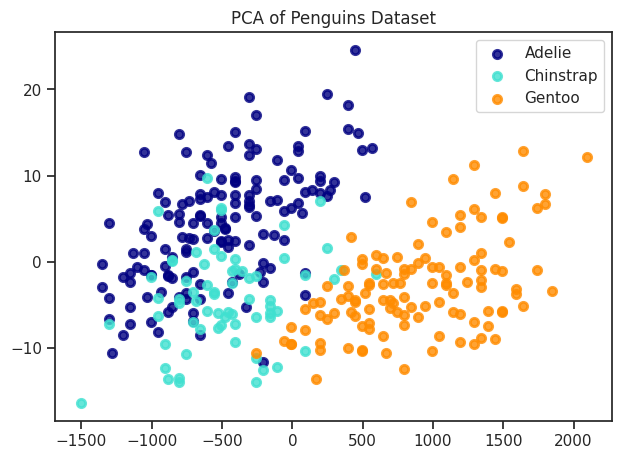

In [541]:
from sklearn.decomposition import PCA

# División del dataset en características/campos/features y variable objetivo
X = df.drop('species', axis=1)
y = df.species  # 'species' is the target variable

pca = PCA(n_components=2)  # Reduce a 2 componentes principales
components = pca.fit_transform(X)
# flip just for my mental health to have consistance with the video
components[:, 1] = -components[:, 1]

# Representación 2D del PCA
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Total explained variance by 2 components: {total_var:.2f}%') # % de varianza preservada

target_names = df.species
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        components[y == i, 0], components[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(species_name, loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Penguins Dataset')
plt.show()

Aquí podemos si las diferentes especies de pingüinos se separan bien en el espacio definido por los dos primeros componentes principales. Si las especies están bien separadas, indica que las características originales contienen información relevante para distinguir entre ellas. Si hay solapamiento significativo, puede ser necesario considerar más componentes principales o explorar otras técnicas de reducción de dimensionalidad o selección de características.
> PCA sign is arbitrary and can vary between runs due to the nature of the algorithm ?? https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers

In [542]:
import plotly.express as px

pca = PCA(n_components=3)  # Reduce a 3 componentes principales
components = pca.fit_transform(X)
# flip just for my mental health to have consistance with the video
components[:, 1] = -components[:, 1]

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components,
    x=0,
    y=1,
    z=2,
    color=df['species'],
    title=f'3D PCA of Penguins Dataset (Explained Variance: {total_var:.2f}%)',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

La representación en 3D es bastante mejor ya que muestra que con 3 componentes principales podemos separar mejor las diferentes especies de pingüinos.

##### 4.4.2.2 LDA (Linear Discriminant Analysis)
- Técnica de reducción de dimensionalidad supervisada que busca encontrar una combinación lineal de características que mejor separen las clases en la variable objetivo.
- A diferencia de PCA, que es una técnica no supervisada, LDA utiliza la información de las etiquetas de clase para maximizar la separabilidad entre las clases.
- Útil para problemas de clasificación, especialmente cuando las clases están bien definidas.

Total explained variance by 2 LDA components: 100.00%


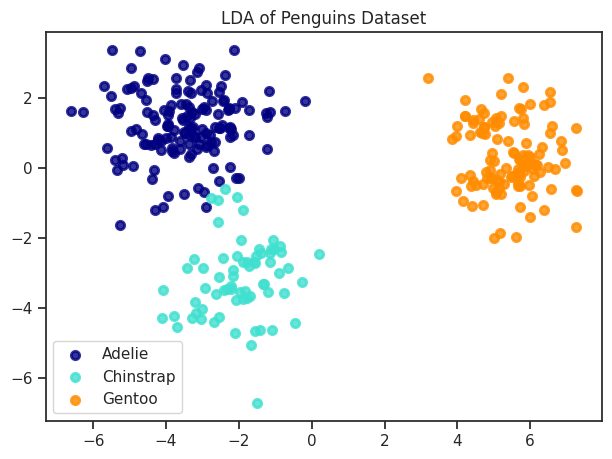

In [543]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
components_lda = lda.fit_transform(X=X, y=y)

total_var_lda = np.sum(lda.explained_variance_ratio_) * 100
print(f'Total explained variance by 2 LDA components: {total_var_lda:.2f}%') # % de varianza preservada

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        components_lda[y == i, 0], components_lda[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(species_name, loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Penguins Dataset')
plt.show()

##### 4.4.2.3 Análisis discriminatorio generalizado/gaussiano (Generalized/ Gaussian Discriminant Analysis)
- Extensión de LDA que asume que las clases siguen una distribución gaussiana y permite modelar diferentes covarianzas para cada clase.

### 4.5 Ingeniería de características (Feature Engineering)
- Proceso de crear nuevas variables o features a partir de las features existentes en el conjunto de datos.
- Objetivo: mejorar el rendimiento de los modelos de machine learning al proporcionar características más relevantes y representativas del problema.
- Require conocimiento del dominio para identificar características potencialmente útiles e imaginación.
- Este término también puede englobar el proceso completo de transformación de datos (secciones anteriores) o sinónimo de data preparation.

In [544]:
df.columns

Index(['species', 'island', 'sex', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'flipper_length_bins',
       'culmen_length_bins', 'culmen_depth_bins'],
      dtype='object')

Ejemplo usando temperatura de los pingüinos si estuviera disponible. O body girth https://www.researchgate.net/publication/230697511_Body_Girth_as_an_Alternative_to_Body_Mass_for_Establishing_Condition_Indexes_in_Field_Studies_A_Validation_in_the_King_Penguin

In [545]:
df_2 = pd.read_csv('datasets/penguins_lter.csv')
df_2.columns.to_list()

['studyName',
 'Sample Number',
 'Species',
 'Region',
 'Island',
 'Stage',
 'Individual ID',
 'Clutch Completion',
 'Date Egg',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Sex',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)',
 'Comments']

Example analysis https://www.kaggle.com/code/diousjoseph/penguins-lter-dataset-descriptive-statistics-eda

#### 4.3.1 Análisis bivariable para ver relaciones entre variables.

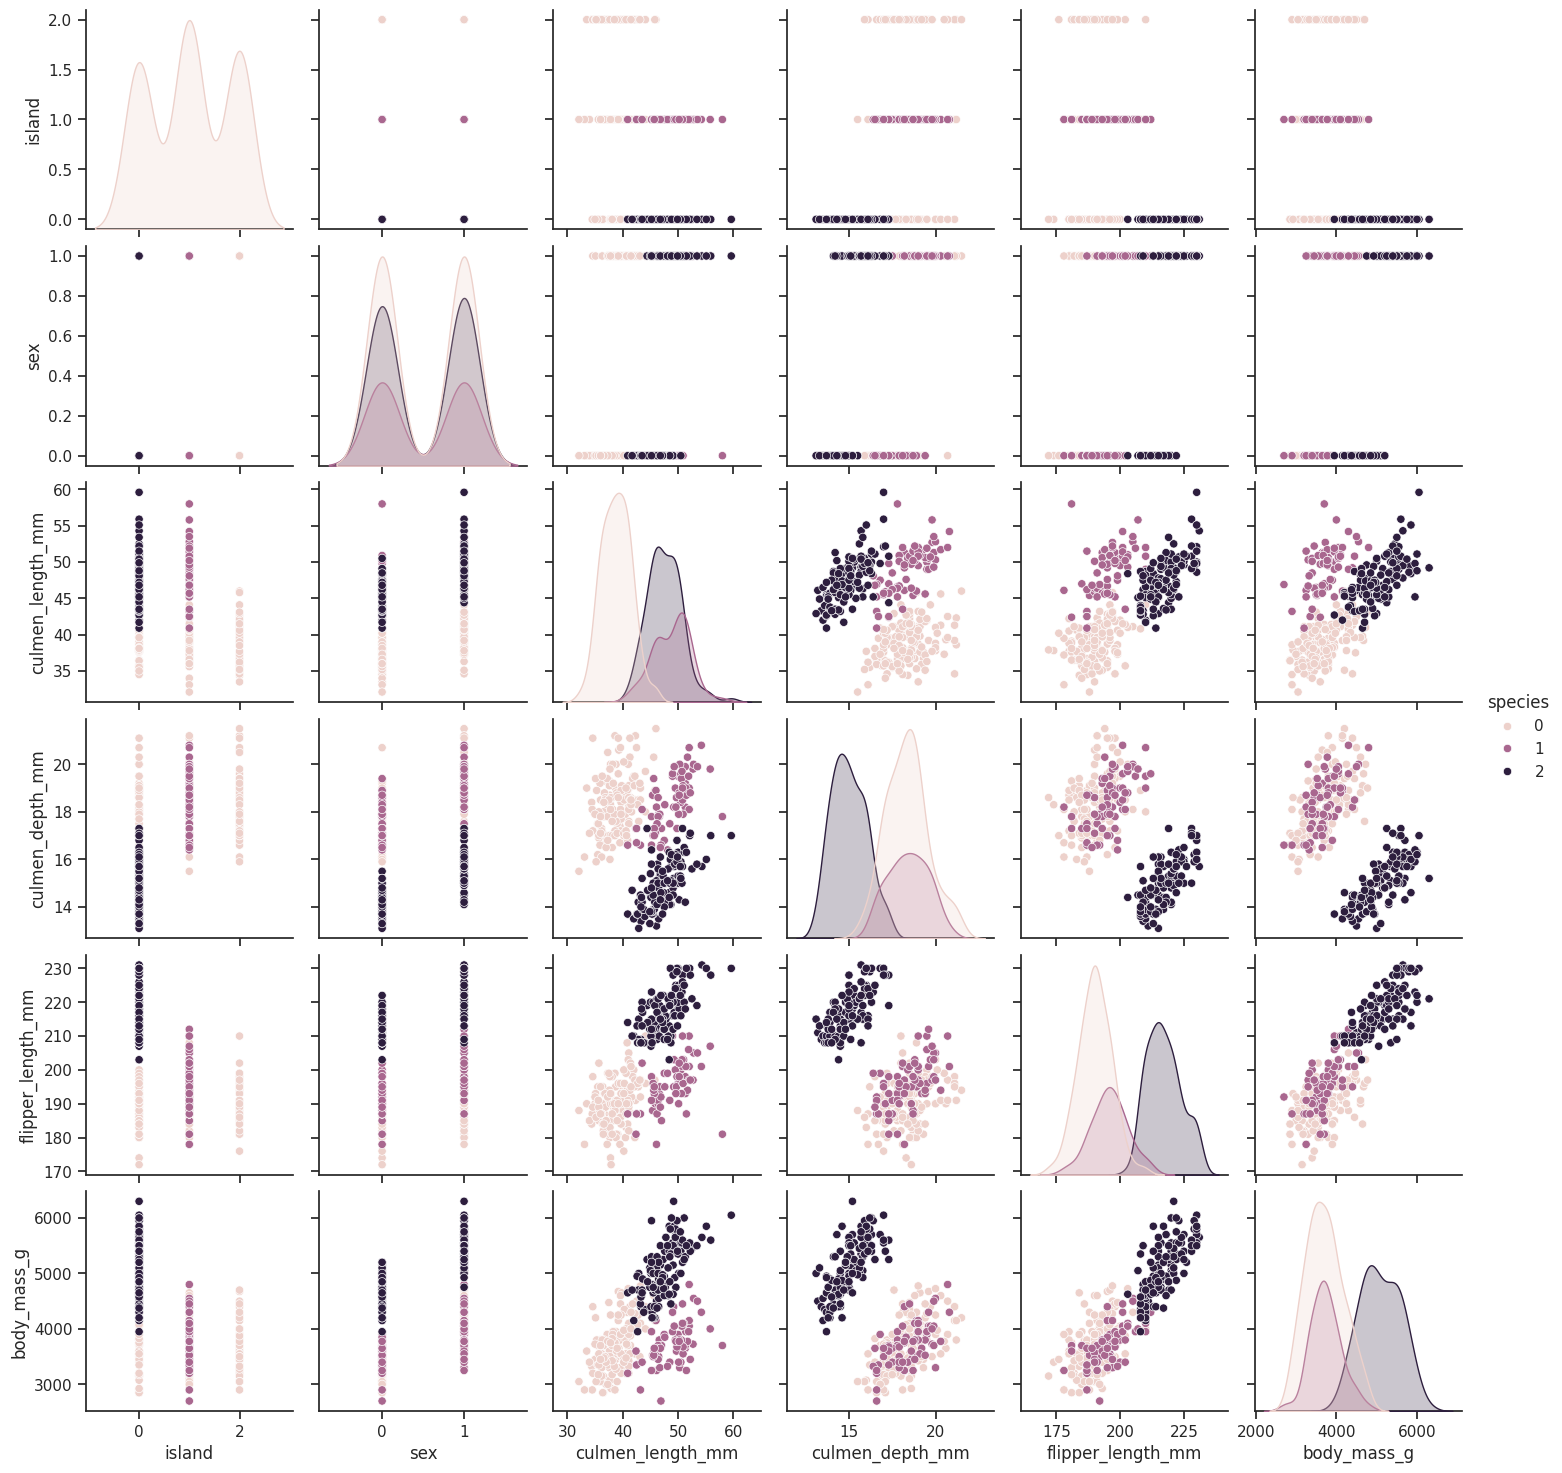

In [546]:
%matplotlib inline
sns.pairplot(df.select_dtypes(include=np.number), hue='species')

#### 4.3.2 Covarianza y correlación
- Covarianza: mide cómo dos variables varían juntas. Una covarianza positiva indica que ambas variables tienden a aumentar o disminuir juntas, mientras que una covarianza negativa indica que cuando una variable aumenta, la otra tiende a disminuir.
- Correlación: mide la fuerza y dirección de la relación lineal entre dos variables. La correlación se expresa como un valor entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta y 0 ninguna correlación lineal.

In [547]:
df.cov()

species     island        sex     culmen_length_mm  \
species                0.791599   -0.395799    0.004884        3.554534     
island                -0.395799    0.510818   -0.004450       -1.317880     
sex                    0.004884   -0.004450    0.250733        0.942201     
culmen_length_mm       3.554534   -1.317880    0.942201       29.906333     
culmen_depth_mm       -1.297134    0.799471    0.367478       -2.462091     
flipper_length_mm     10.608759   -5.553710    1.790812       50.058195     
body_mass_g          537.622110 -322.007173  171.353658     2595.623304     
flipper_length_bins    0.828313   -0.429050    0.139558        4.029418     
culmen_length_bins     0.726555   -0.274757    0.192066        5.907153     
culmen_depth_bins     -0.702377    0.430840    0.199664       -1.308016     

                     culmen_depth_mm  flipper_length_mm   body_mass_g   \
species                 -1.297134          10.608759        537.622110   
island                   0.799471          -5.553710       -322.007173   
sex                      0.367478           1.790812        171.353658   
culmen_length_mm        -2.462091          50.058195       2595.623304   
culmen_depth_mm          3.877888         -15.947248       -748.456122   
flipper_length_mm      -15.947248         196.441677       9852.191649   
body_mass_g           -748.456122        9852.191649     648372.487699   
flipper_length_bins     -1.206325          15.159304        749.790830   
culmen_length_bins      -0.529437          10.242122        527.634638   
culmen_depth_bins        2.089010          -8.722231       -408.177756   

                     flipper_length_bins  culmen_length_bins  \
species                    0.828313             0.726555       
island                    -0.429050            -0.274757       
sex                        0.139558             0.192066       
culmen_length_mm           4.029418             5.907153       
culmen_depth_mm           -1.206325            -0.529437       
flipper_length_mm         15.159304            10.242122       
body_mass_g              749.790830           527.634638       
flipper_length_bins        1.307898             0.823963       
culmen_length_bins         0.823963             1.268714       
culmen_depth_bins         -0.663320            -0.275118       

                     culmen_depth_bins  
species                  -0.702377      
island                    0.430840      
sex                       0.199664      
culmen_length_mm         -1.308016      
culmen_depth_mm           2.089010      
flipper_length_mm        -8.722231      
body_mass_g            -408.177756      
flipper_length_bins      -0.663320      
culmen_length_bins       -0.275118      
culmen_depth_bins         1.238051

In [548]:
df.corr()

species   island      sex    culmen_length_mm  \
species              1.000000 -0.622428  0.010964      0.730548       
island              -0.622428  1.000000 -0.012435     -0.337179       
sex                  0.010964 -0.012435  1.000000      0.344078       
culmen_length_mm     0.730548 -0.337179  0.344078      1.000000       
culmen_depth_mm     -0.740346  0.568031  0.372673     -0.228626       
flipper_length_mm    0.850737 -0.554413  0.255169      0.653096       
body_mass_g          0.750434 -0.559526  0.424987      0.589451       
flipper_length_bins  0.814057 -0.524913  0.243704      0.644279       
culmen_length_bins   0.724993 -0.341298  0.340535      0.958991       
culmen_depth_bins   -0.709494  0.541769  0.358364     -0.214962       

                     culmen_depth_mm  flipper_length_mm  body_mass_g  \
species                -0.740346          0.850737        0.750434     
island                  0.568031         -0.554413       -0.559526     
sex                     0.372673          0.255169        0.424987     
culmen_length_mm       -0.228626          0.653096        0.589451     
culmen_depth_mm         1.000000         -0.577792       -0.472016     
flipper_length_mm      -0.577792          1.000000        0.872979     
body_mass_g            -0.472016          0.872979        1.000000     
flipper_length_bins    -0.535648          0.945748        0.814218     
culmen_length_bins     -0.238690          0.648771        0.581754     
culmen_depth_bins       0.953397         -0.559296       -0.455583     

                     flipper_length_bins  culmen_length_bins  \
species                   0.814057             0.724993        
island                   -0.524913            -0.341298        
sex                       0.243704             0.340535        
culmen_length_mm          0.644279             0.958991        
culmen_depth_mm          -0.535648            -0.238690        
flipper_length_mm         0.945748             0.648771        
body_mass_g               0.814218             0.581754        
flipper_length_bins       1.000000             0.639644        
culmen_length_bins        0.639644             1.000000        
culmen_depth_bins        -0.521275            -0.219517        

                     culmen_depth_bins  
species                 -0.709494       
island                   0.541769       
sex                      0.358364       
culmen_length_mm        -0.214962       
culmen_depth_mm          0.953397       
flipper_length_mm       -0.559296       
body_mass_g             -0.455583       
flipper_length_bins     -0.521275       
culmen_length_bins      -0.219517       
culmen_depth_bins        1.000000

<Axes: >

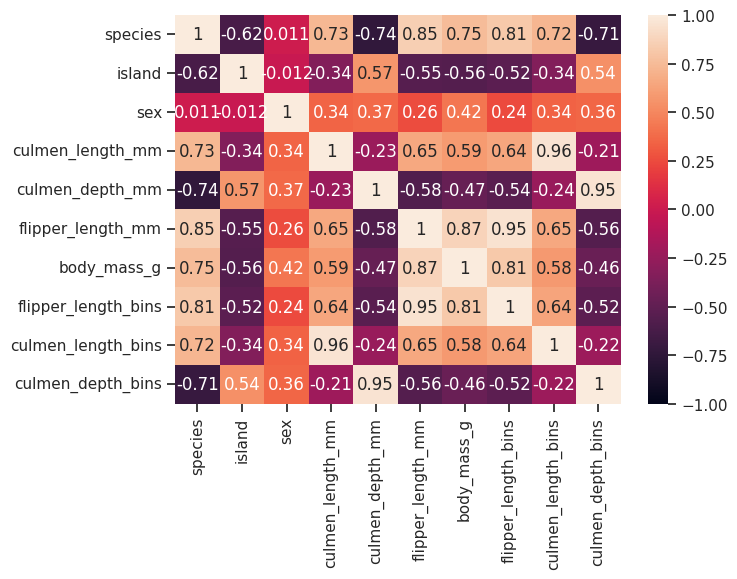

In [549]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Exploración general para ver que nuevas variables podemos crear a partir de las existentes.

Ejemplo nueva variable: body_mass_flipper_length_ratio = body_mass_g / flipper_length_mm. Relación entre masa corporal y longitud de aleta.

In [550]:
df['body_mass_flipper_length_ratio'] = df['body_mass_g'] / df['flipper_length_mm']
print(f"min: {df['body_mass_flipper_length_ratio'].min()}, max: {df['body_mass_flipper_length_ratio'].max()}, mean: {df['body_mass_flipper_length_ratio'].mean()}, std: {df['body_mass_flipper_length_ratio'].std()}")

min: 14.0625, max: 28.506787330316744, mean: 20.79697796125644, std: 2.774064493170574


''

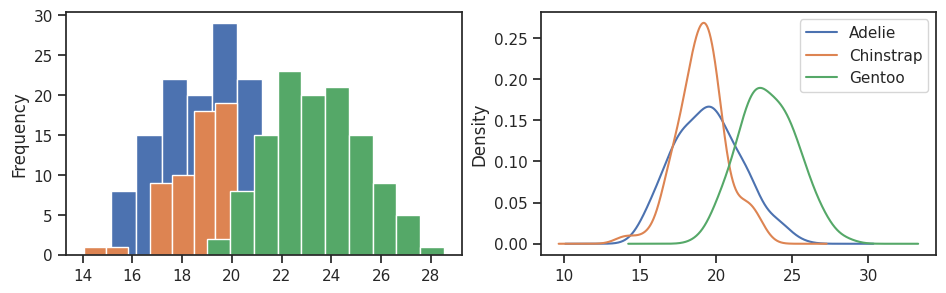

In [551]:
fig, ax = plt.subplots(1, 2)
df.groupby('species').body_mass_flipper_length_ratio.plot(kind='kde', figsize=(10, 3), ax=ax[1])
df.groupby('species').body_mass_flipper_length_ratio.plot(kind='hist', figsize=(10, 3), ax=ax[0])
plt.legend(species_name)
;

Ejemplo de nueva variable: body_mass_culmen_length_ratio = body_mass_g / culmen_length_mm. Relación entre masa corporal y longitud de culmen. Densidad del pico.

''

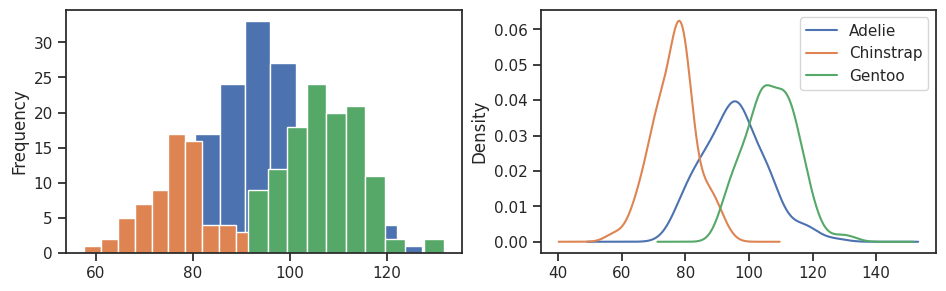

In [552]:
df['body_mass_culmen_length_ratio'] = df['body_mass_g'] / df['culmen_length_mm']

fig, ax = plt.subplots(1, 2)
df.groupby('species').body_mass_culmen_length_ratio.plot(kind='kde', figsize=(10, 3), ax=ax[1])
df.groupby('species').body_mass_culmen_length_ratio.plot(kind='hist', figsize=(10, 3), ax=ax[0])
plt.legend(species_name)
;

Ejemplo de nueva variable: culmen_length_flipper_length_ratio. Relación entre culmen and pico length.

''

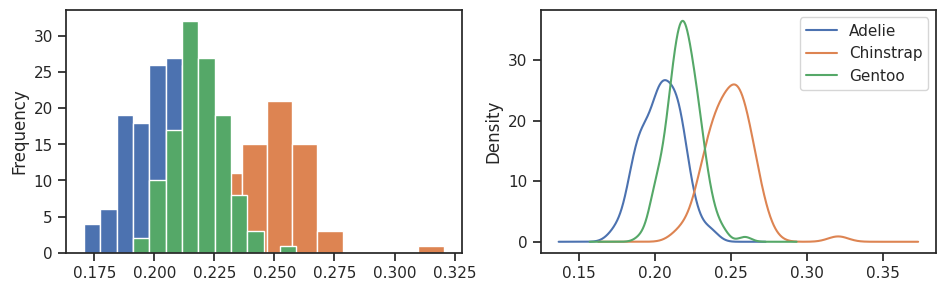

In [553]:
df['culmen_length_flipper_length_ratio'] = df['culmen_length_mm'] / df['flipper_length_mm']

fig, ax = plt.subplots(1, 2)
df.groupby('species').culmen_length_flipper_length_ratio.plot(kind='kde', figsize=(10, 3), ax=ax[1])
df.groupby('species').culmen_length_flipper_length_ratio.plot(kind='hist', figsize=(10, 3), ax=ax[0])
plt.legend(species_name)
;

Relación entre body mass flipper length ratio and body mass culmen length ratio.

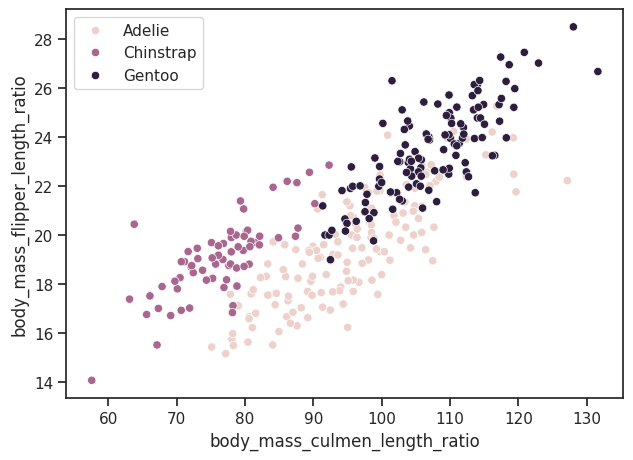

In [554]:
X = df[['body_mass_flipper_length_ratio', 'body_mass_culmen_length_ratio']]
sns.scatterplot(data=X, x='body_mass_culmen_length_ratio', y='body_mass_flipper_length_ratio', hue=df['species'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, species_name)
plt.show()

In [555]:
import plotly.express as px

X = df[['body_mass_flipper_length_ratio', 'body_mass_culmen_length_ratio', 'culmen_length_flipper_length_ratio', 'species']]
y = df['species']

fig = px.scatter_3d(
    X,
    x='body_mass_flipper_length_ratio',
    y='body_mass_culmen_length_ratio',
    z='culmen_length_flipper_length_ratio',
    color=df['species'],
    title=f"Total Explained Variance: {total_var:.2f}%",
    labels={
        'body_mass_flipper_length_ratio': 'Body Mass / Flipper Length',
        'body_mass_culmen_length_ratio': 'Body Mass / Culmen Length',
        'culmen_length_flipper_length_ratio': 'Culmen Length / Flipper Length'
    }
)
fig.show()

Vemos que hay cierto solapamiento

## 5. Separación de datos (Data Splitting)
- Su objetivo es dividir el conjunto de datos en subconjuntos para entrenar, validar y evaluar modelos de machine learning.
- De esa manera evita:
    - No tener datos suficientes para evaluar el rendimiento del modelo.
    - Overfitting: El modelo aprende demasiado bien los datos de entrenamiento, pero no generaliza bien a datos nuevos.
- Necesario para todo modelo que realice predicciones. Sobre todo en problemas supervisados (clasificación y regresión).
- Pero también puede ser útil en problemas no supervisados dependiendo del algoritmo utilizado:
    - Los que usen centroides para realizar predicciones (K-means, KNN, etc.) pueden beneficiarse de tener un conjunto de datos de prueba para evaluar la calidad de los centroides generados.
    - Detección de anomalías/outliers (Datos normales: clase "1", outliers: clase "-1"): Necesitan un conjunto de datos de prueba para evaluar la capacidad del modelo para identificar correctamente los outliers.
    - etc
- Divisón en diferentes conjuntos:
    - Conjunto de entrenamiento (Training set): Usado para entrenar el modelo.
    - Conjunto de validación (Validation set): Usado para evaluar el desempeño o performance del modelo durante el entrenamiento.
    - Conjunto de prueba (Test set): Usado para evaluar el rendimiento final del modelo.

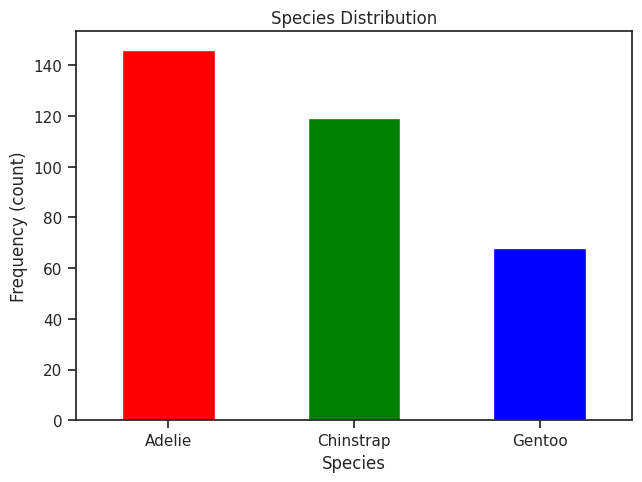

In [615]:
counts = df.species.value_counts()
ax = counts.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
ax.set_xticklabels(species_name)
ax.set_title('Species Distribution')
plt.ylabel('Frequency (count)') # Etiqueta del eje Y using matplotlib
plt.xlabel('Species') # Etiqueta del eje X using matplotlib
plt.show()

### 5.1 Sampleo Aleatorio (Random Sampling)
- Técnica para seleccionar una muestra representativa de un conjunto de datos más grande.
- Cada observación tiene la misma probabilidad de ser seleccionada.

In [616]:
from sklearn.model_selection import train_test_split

X, y = df.drop('species', axis=1), df.species

# Normalmente se usa un 20-30% para test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(f"X train shape: {X_train.shape}, X test shape: {X_test.shape}")

X train shape: (266, 12), X test shape: (67, 12)


<Axes: xlabel='species'>

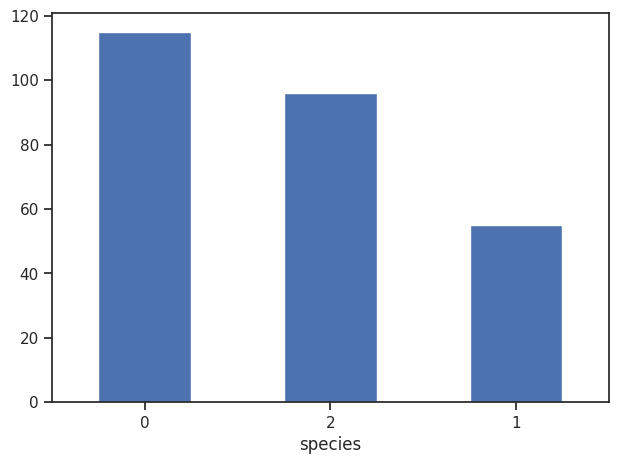

In [617]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: xlabel='species'>

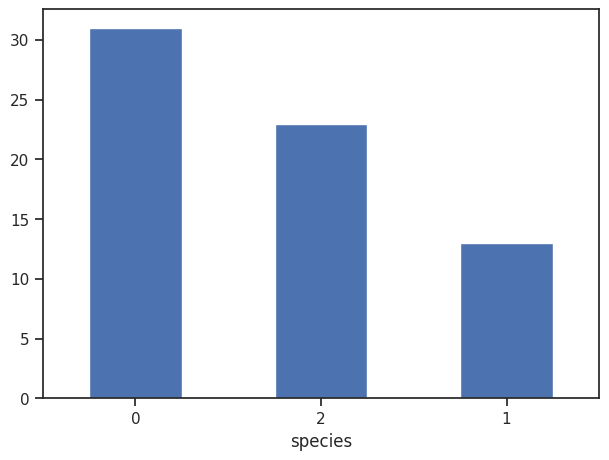

In [618]:
y_test.value_counts().plot(kind='bar', rot=0)

In [619]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_ratio, random_state=SEED)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio+val_ratio), random_state=SEED)

print(f"X train shape: {X_train.shape}, X val shape: {X_val.shape}, X test shape: {X_test.shape}")

X train shape: (266, 12), X val shape: (34, 12), X test shape: (33, 12)


<Axes: xlabel='species'>

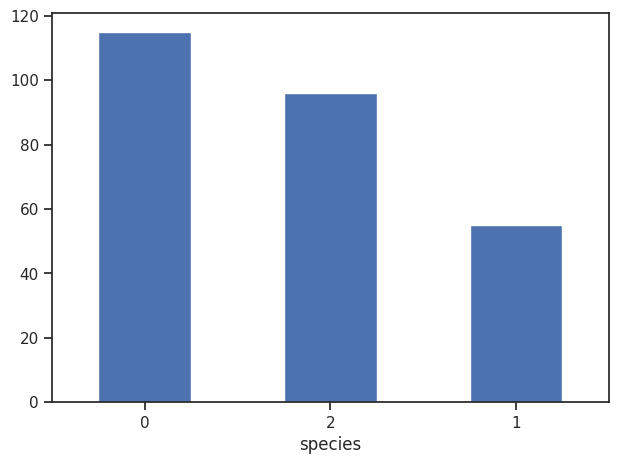

In [620]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: xlabel='species'>

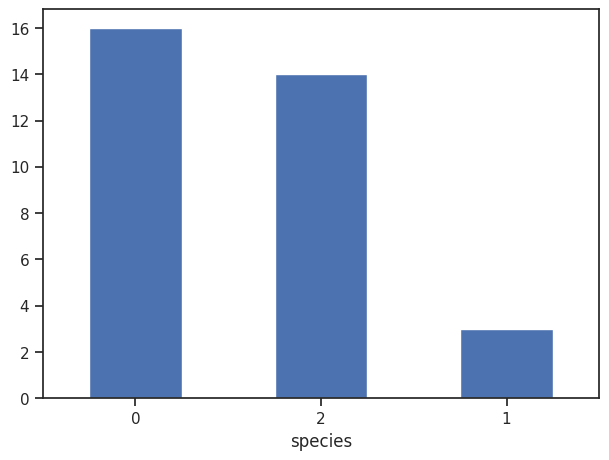

In [621]:
y_test.value_counts().plot(kind='bar', rot=0)

<Axes: xlabel='species'>

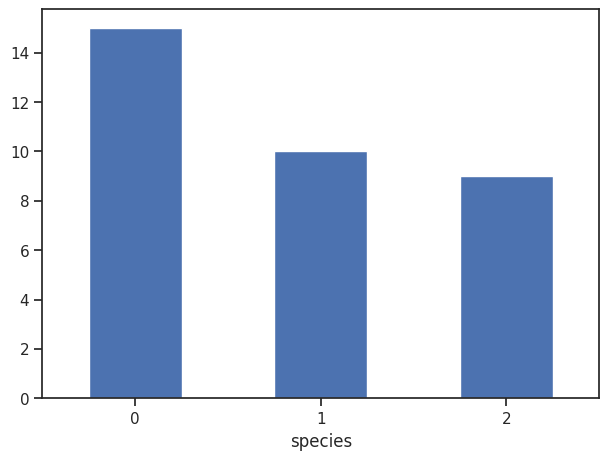

In [622]:
y_val.value_counts().plot(kind='bar', rot=0)

Algunos están desbalanceados, eso podría corregirse con sampleo estratificado.

### 5.2 Sampleo estratificado (Stratified Sampling)
- Técnica de muestreo que divide el conjunto de datos en subgrupos o estratos basados en una o más variables categóricas.
- Luego, se selecciona una muestra aleatoria de cada estrato, asegurando que la proporción de cada categoría en la muestra sea representativa de la proporción en el conjunto de datos original.
- Útil cuando las categorías en la variable objetivo están desbalanceadas.
- Ayuda a mantener la distribución de clases en los conjuntos de entrenamiento, validación y prueba.

In [623]:
from sklearn.model_selection import train_test_split

X, y = df.drop('species', axis=1), df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(f"X train shape: {X_train.shape}, X test shape: {X_test.shape}")

X train shape: (266, 12), X test shape: (67, 12)


<Axes: xlabel='species'>

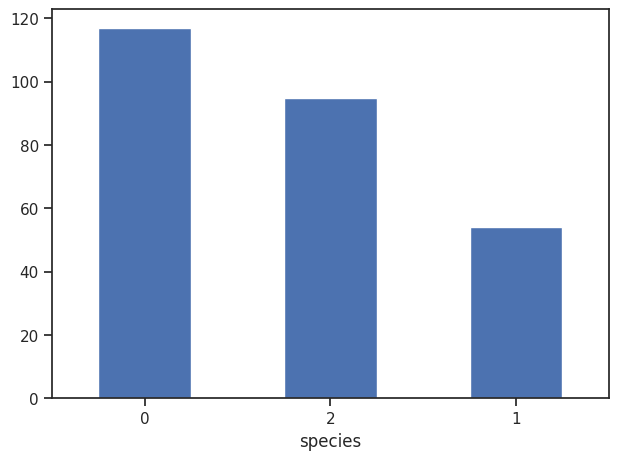

In [624]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: xlabel='species'>

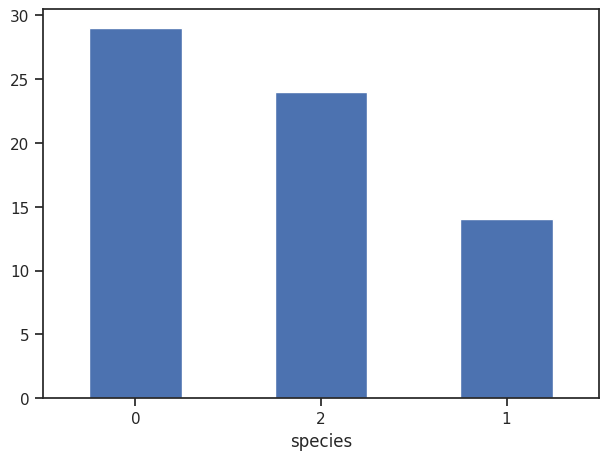

In [625]:
y_test.value_counts().plot(kind='bar', rot=0)

In [626]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=SEED, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + val_ratio), random_state=SEED, stratify=y_test)

print(f"X train shape: {X_train_val.shape}, X val shape: {X_val.shape}, X test shape: {X_test.shape}")

X train shape: (266, 12), X val shape: (34, 12), X test shape: (33, 12)


<Axes: xlabel='species'>

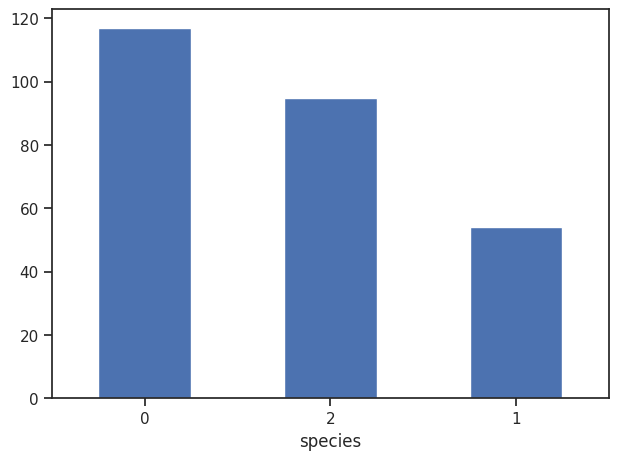

In [627]:
y_train.value_counts().plot(kind='bar', rot=0)

<Axes: xlabel='species'>

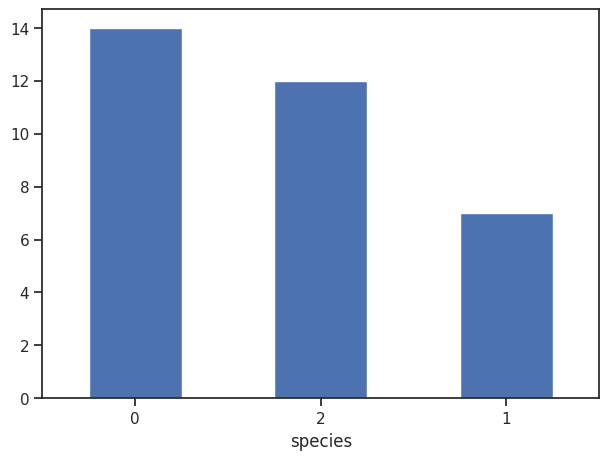

In [628]:
y_test.value_counts().plot(kind='bar', rot=0)

<Axes: xlabel='species'>

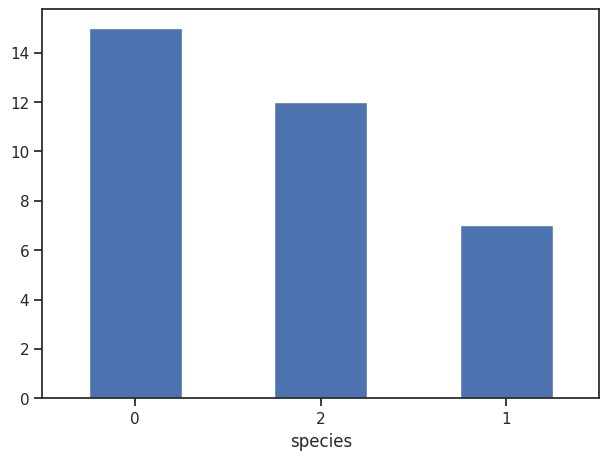

In [629]:
y_val.value_counts().plot(kind='bar', rot=0)

### 5.3 Advanced data splitting methods. Time-based splitting
- Los datos son separados en función de diferentes rangos de fechas.
- Es crucial que datos del "pasado" aparezcan en el futuro:
    - Las fechas del split train no pueden ser mayores que las del split val o test.
    - Las fechas del split val no pueden ser mayores que las del split test.
    - Las fechas del split test son las más recientes.
> Esto es especialmente importante en series temporales donde la dependencia temporal es clave para el análisis y la predicción.


> You can find the data at https://www.kaggle.com/datasets/neuromusic/avocado-prices/data
> Example of cleaning https://www.kaggle.com/datasets/neuromusic/avocado-prices/discussion/340388
> More data https://www.kaggle.com/datasets/timmate/avocado-prices-2020

In [630]:
df_avocado = pd.read_csv('datasets/avocado.csv')
df_avocado.head()

Unnamed: 0     Date     AveragePrice  Total Volume   4046      4225     \
0       0      2015-12-27      1.33         64236.62   1036.74   54454.85   
1       1      2015-12-20      1.35         54876.98    674.28   44638.81   
2       2      2015-12-13      0.93        118220.22    794.70  109149.67   
3       3      2015-12-06      1.08         78992.15   1132.00   71976.41   
4       4      2015-11-29      1.28         51039.60    941.48   43838.39   

    4770   Total Bags  Small Bags  Large Bags  XLarge Bags      type      \
0   48.16    8696.87     8603.62      93.25        0.0      conventional   
1   58.33    9505.56     9408.07      97.49        0.0      conventional   
2  130.50    8145.35     8042.21     103.14        0.0      conventional   
3   72.58    5811.16     5677.40     133.76        0.0      conventional   
4   75.78    6183.95     5986.26     197.69        0.0      conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [631]:
df_avocado.sort_values(by='Date', ascending=True, inplace=True)
df_avocado.reset_index(drop=True, inplace=True)
df_avocado.head()

Unnamed: 0     Date     AveragePrice  Total Volume   4046      4225    \
0      51      2015-01-04      1.75        27365.89    9307.34   3844.81   
1      51      2015-01-04      1.49        17723.17    1189.35  15628.27   
2      51      2015-01-04      1.68         2896.72     161.68    206.96   
3      51      2015-01-04      1.52        54956.80    3013.04  35456.88   
4      51      2015-01-04      1.64         1505.12       1.27   1129.50   

    4770    Total Bags  Small Bags  Large Bags  XLarge Bags      type      \
0   615.28   13598.46    13061.10      537.36       0.0           organic   
1     0.00     905.55      905.55        0.00       0.0           organic   
2     0.00    2528.08     2528.08        0.00       0.0           organic   
3  1561.70   14925.18    11264.80     3660.38       0.0      conventional   
4     0.00     374.35      186.67      187.68       0.0           organic   

   year        region        
0  2015           Southeast  
1  2015             Chicago  
2  2015  HarrisburgScranton  
3  2015          Pittsburgh  
4  2015               Boise

In [632]:
train_frac = 0.8
train = df_avocado.iloc[0:int(df_avocado.shape[0] * train_frac), :]
test = df_avocado.iloc[int(df_avocado.shape[0] * train_frac):, :]
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (14599, 14), Test shape: (3650, 14)


In [633]:
train_frac = 0.8
val_frac = 0.1
test_frac = 0.1

train_row_limit = int(df_avocado.shape[0] * train_frac)
val_row_limit = train_row_limit + int(df_avocado.shape[0] * val_frac)

train = df_avocado.iloc[0:train_row_limit, :]
val = df_avocado.iloc[train_row_limit:val_row_limit, :]
test = df_avocado.iloc[val_row_limit:df_avocado.shape[0], :]
print(f"Train shape: {train.shape}, Val shape: {val.shape}, Test shape: {test.shape}")

Train shape: (14599, 14), Val shape: (1824, 14), Test shape: (1826, 14)


### 5.4 More advanced data splitting methods. Cross-validation for time series
- Los datos son separados en múltiples subsets o folds.
- Algunos de estos folds se usan para el entrenamiento del modelo y otros para la validación.
- La ventaja principal de la validación cruzada es que podemos utilizar todos los datos disponibles tanto para el entrenamiento como para la validación, lo que puede mejorar la robustez y generalización del modelo.

#### 5.4.1 Holdout Cross-Validation
- Sampleo aleatorio, dividiendo el dataset en entrenamiento, validación y test o en entrenamiento y test.
- K-Fold Cross-Validation: Divide el conjunto de datos en K subsets o folds. El modelo se entrena K veces, cada vez utilizando un fold diferente como conjunto de validación y los restantes K-1 folds como conjunto de entrenamiento. El rendimiento del modelo se evalúa promediando los resultados de las K iteraciones.

<img src=images/k-fold_cross-validation.png width=600 height=300>

In [634]:
from sklearn.model_selection import KFold

X = df.drop('species', axis=1)
y = df.species  # 'species' is the target variable
n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
fold_count = 1

for train_index, test_index in cv.split(X, y):
    print(f"Fold {fold_count}, Train set: {len(train_index)}, Test set: {len(test_index)}")
    fold_count += 1

Fold 1, Train set: 266, Test set: 67
Fold 2, Train set: 266, Test set: 67
Fold 3, Train set: 266, Test set: 67
Fold 4, Train set: 267, Test set: 66
Fold 5, Train set: 267, Test set: 66


In [635]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Creates a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for i, (train, test) in enumerate(cv.split(X, y, group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[train] = 0
        indices[test] = 1

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [i + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=plt.cm.coolwarm,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the dataclasses and groups at the end
    ax.scatter(
        range(len(X)),
        [i + 1.5] * len(X),
        c=y,
        marker="_",
        lw=lw,
        cmap=plt.cm.Paired,
    )

    ax.scatter(
        range(len(X)),
        [i + 2.5] * len(X),
        c=group,
        marker="_",
        lw=lw,
        cmap=plt.cm.Paired,
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set_yticks(np.arange(n_splits + 2) + 0.5)
    ax.set_yticklabels(yticklabels)
    ax.set_xlabel("Sample index")
    ax.set_ylabel("CV iteration")
    ax.set_ylim([n_splits + 2.2, -0.2])
    ax.set_xlim([0, df.shape[0]])

    ax.set_title(f"{type(cv).__name__} with {n_splits} splits", fontsize=15)
    return ax

<Axes: title={'center': 'KFold with 5 splits'}, xlabel='Sample index', ylabel='CV iteration'>

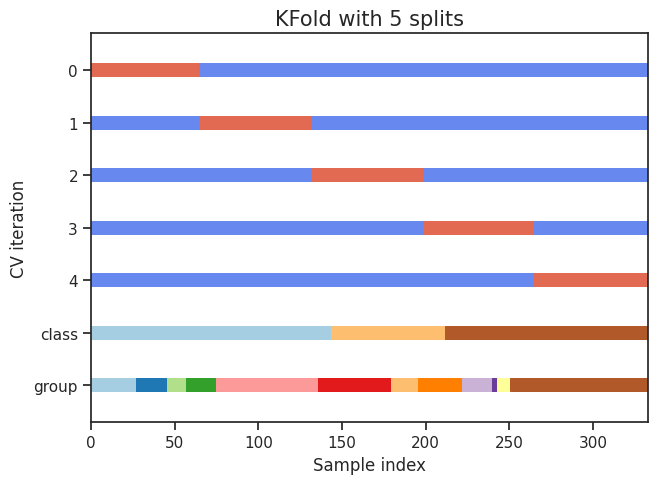

In [636]:
rng = np.random.RandomState(SEED)
group_prior = rng.dirichlet([2] * df.shape[1])
groups = np.repeat(np.arange(df.shape[1]), rng.multinomial(df.shape[0], group_prior)) # Generate uneven groups

fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)


Visualization of the K-Fold Cross-Validation process.

#### 5.4.2 Score Cross-Validation
- Otro método de división de datos https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

#### 5.4.3 Leave-one-out Cross-Validation
- El modelo de ML es entrenado N veces, donde N es el número total de observaciones en el conjunto de datos.
- En cada iteración, se utiliza una sola observación como conjunto de validación y el resto de las observaciones como conjunto de entrenamiento.
- Utiliza el máximo número de observaciones posibles para el entrenamiento. Es especialmente útil cuando el conjunto de datos es pequeño, pero considerablemente más costoso en términos computacionales.
- No se usa tanto

In [637]:
from sklearn.model_selection import LeaveOneOut

X = df.drop('species', axis=1)
y = df.species  # 'species' is the target variable

cv = LeaveOneOut()
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    print(f"Fold {i}, Train: index = {train_index}, Test: index = {test_index}")
    if i == 0:  # Limitar la salida a las primeras 5 iteraciones
        break

Fold 0, Train: index = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241

<img src=images/leave_one_cv.jpg>